<a href="https://colab.research.google.com/github/ttussing/US-Gun-Exploration-Visualization/blob/master/Copy_of_US_Gun_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Legal Gun Owners Still Kill People

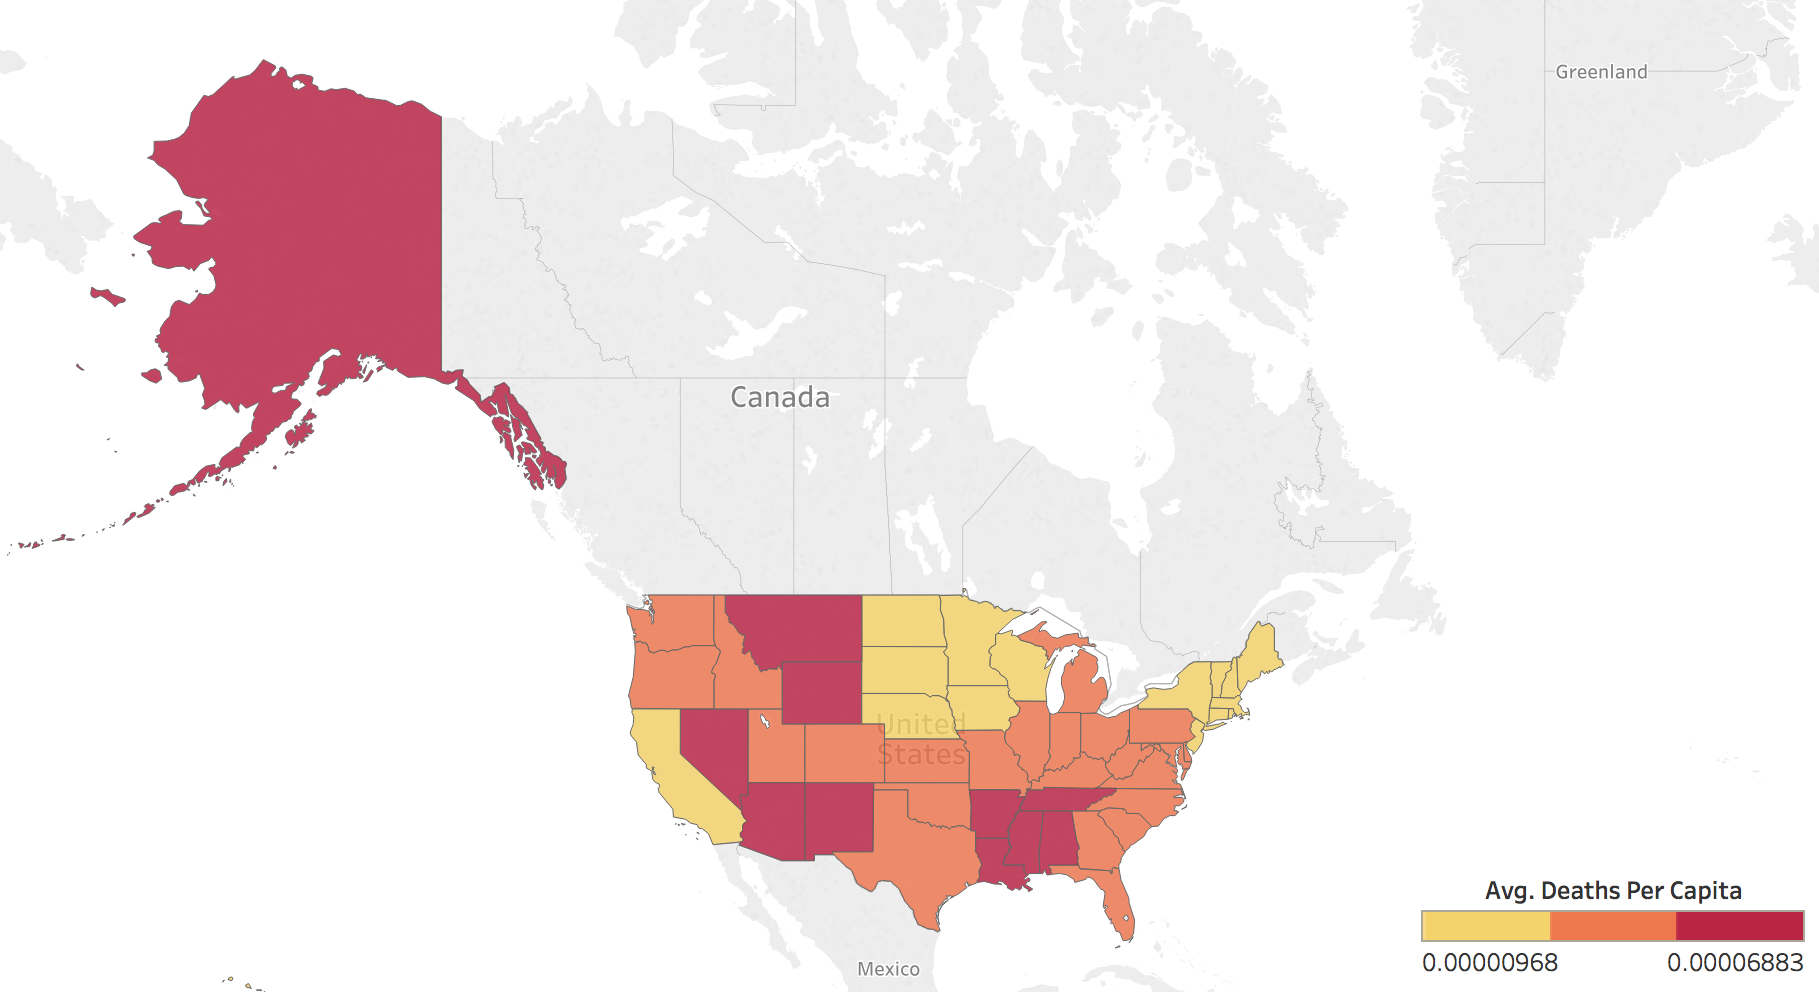

In [1]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/Deaths_by_state.png', width = 1300, height = 700)

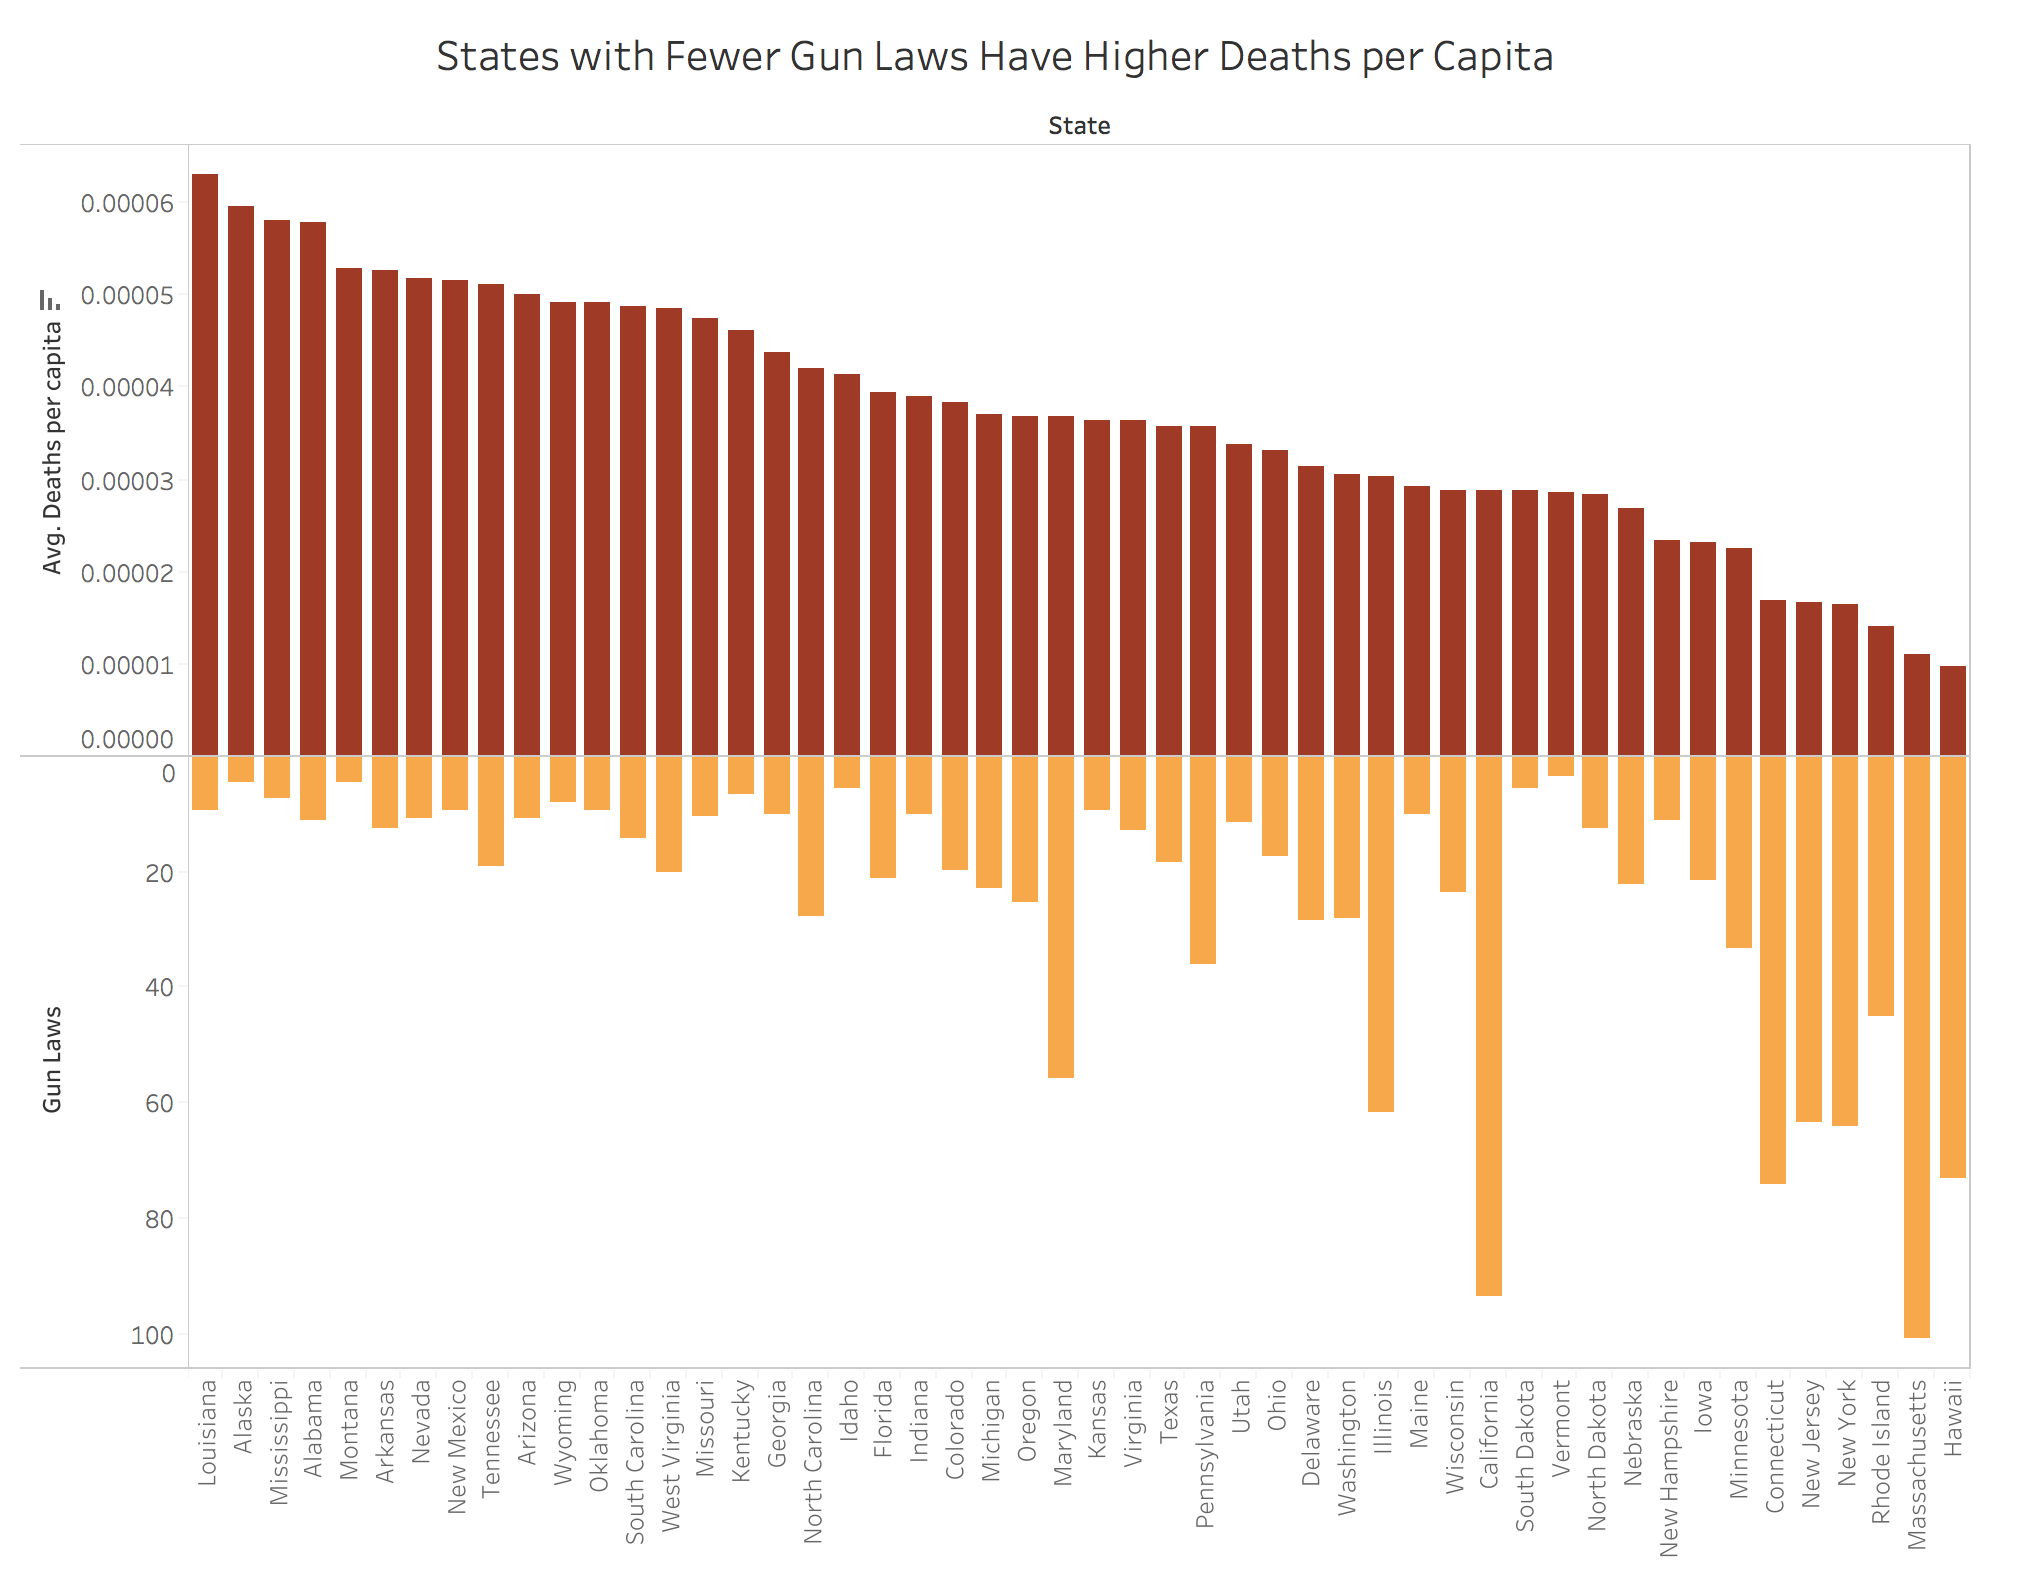

In [59]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/KC_States_fewer.png', width = 1100, height = 800)

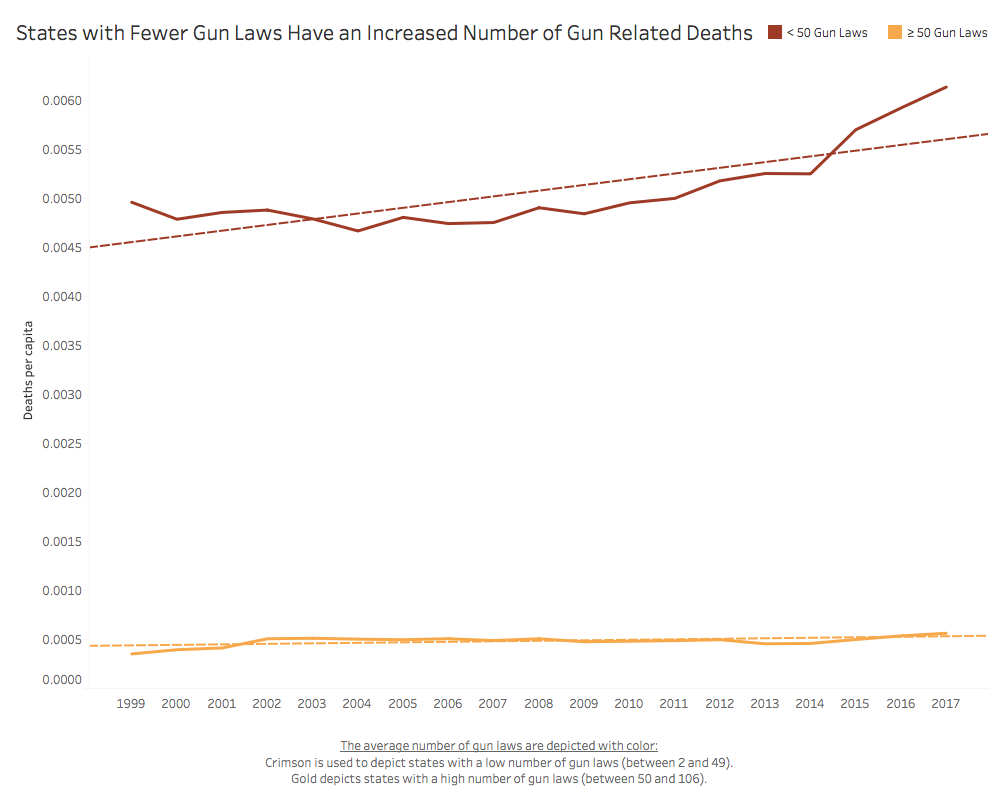

In [3]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/DPC%20over%20time.png', width = 1000, height = 800)

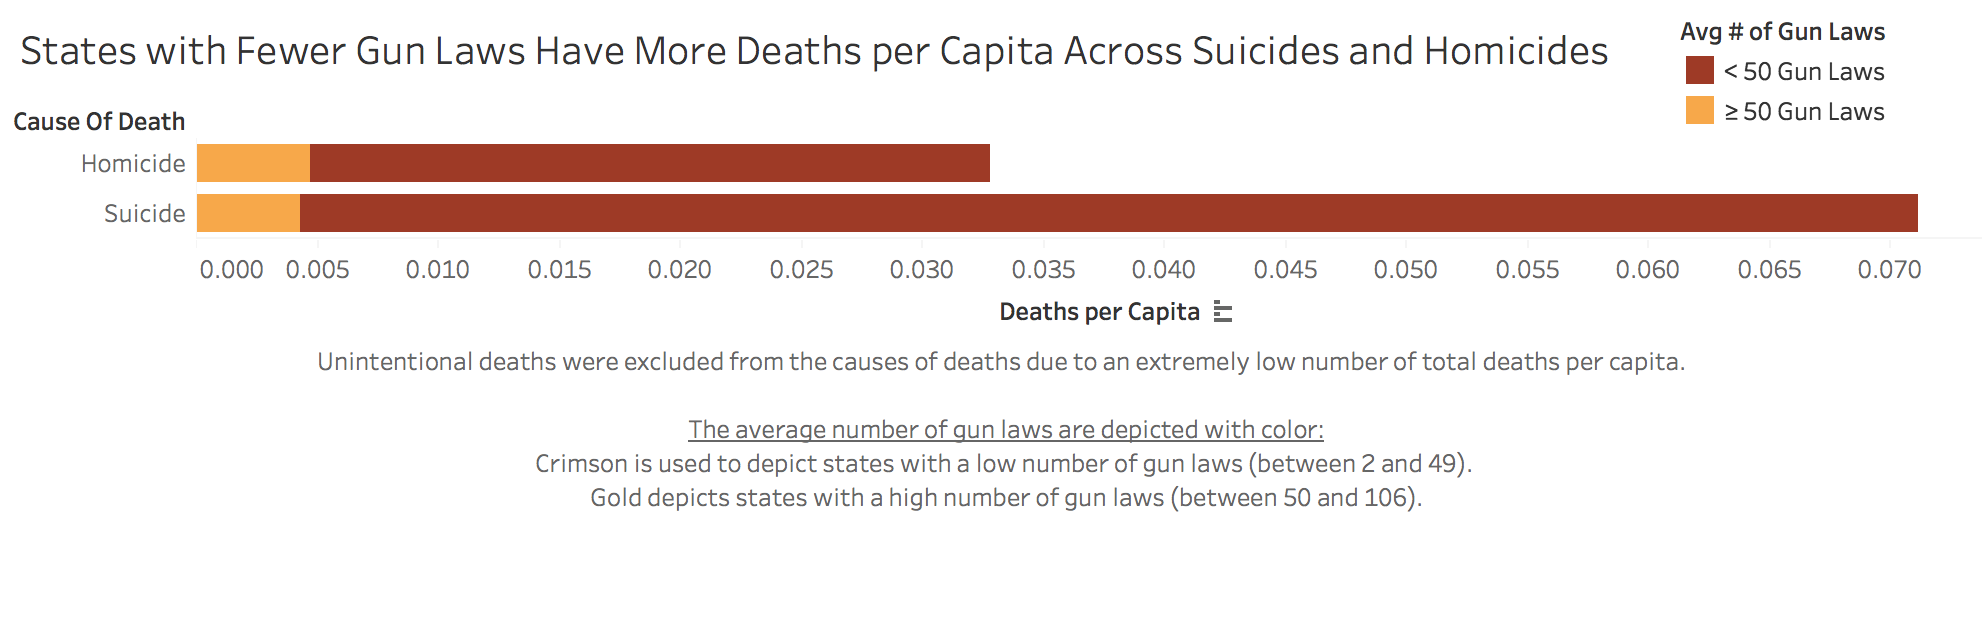

In [4]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/Homicides%20and%20Suicides.png', width = 1300, height = 450)

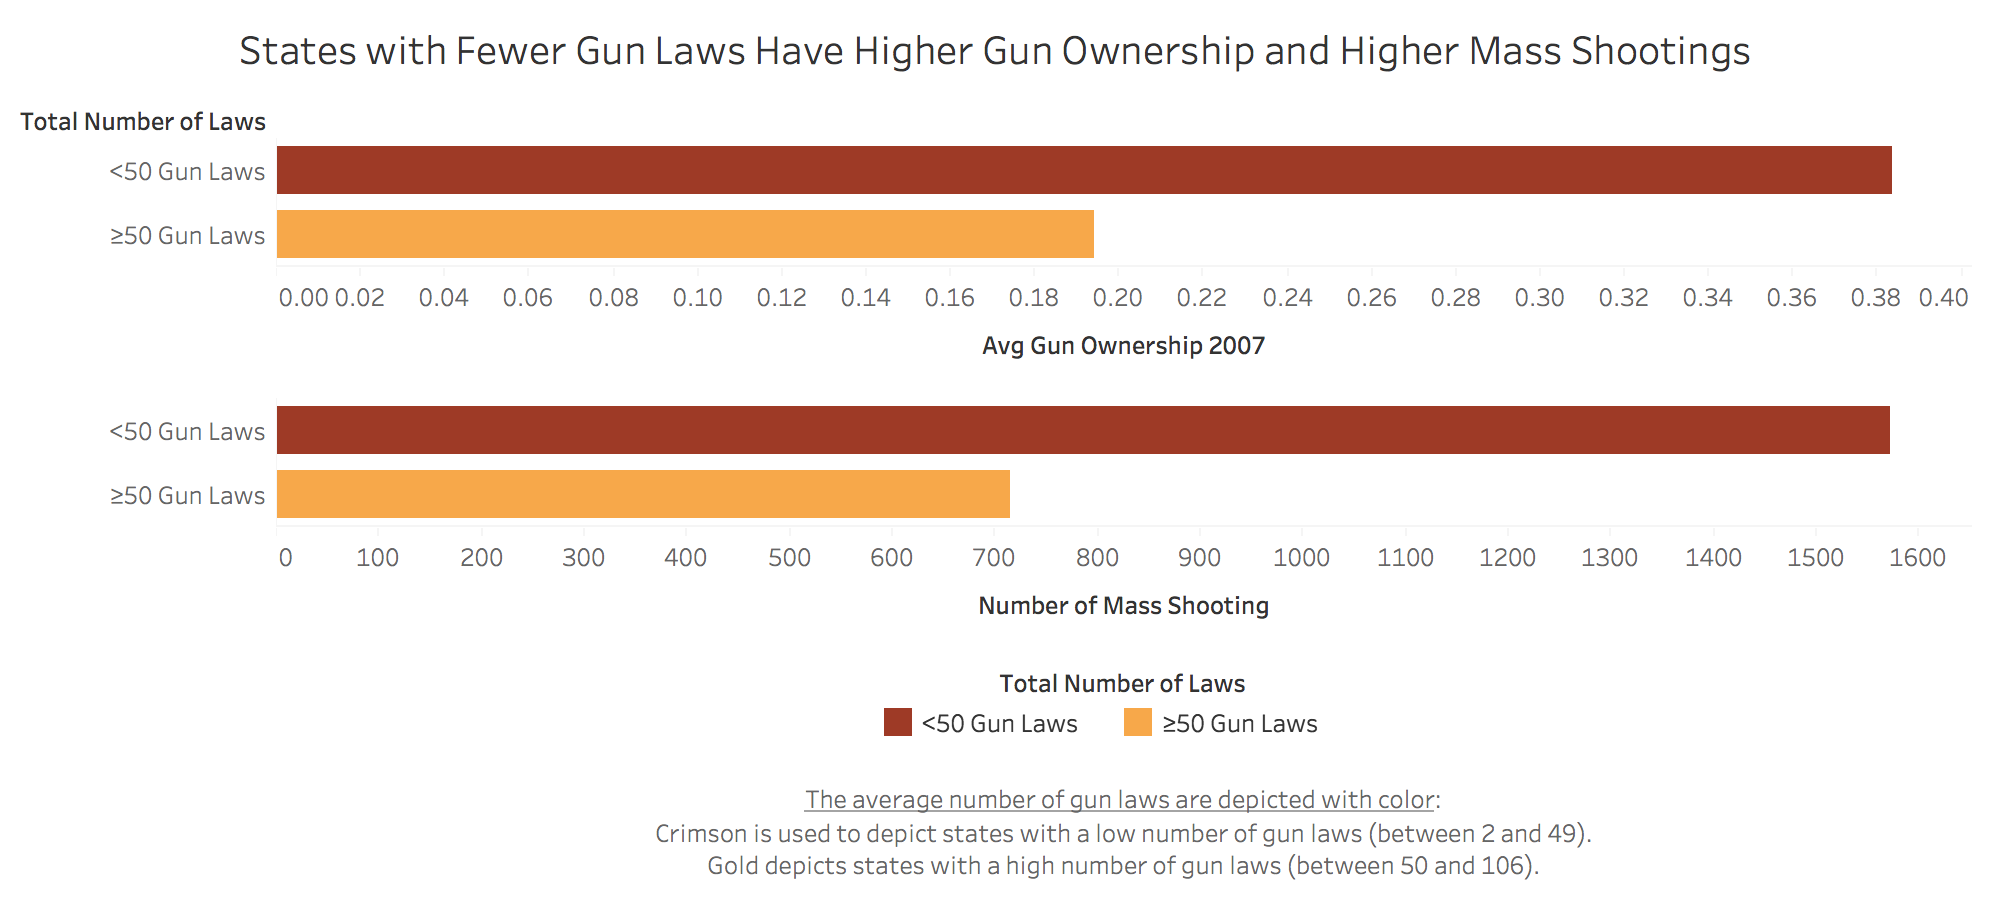

In [5]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/MS_numLaw_revised.png', width = 1200, height = 550)

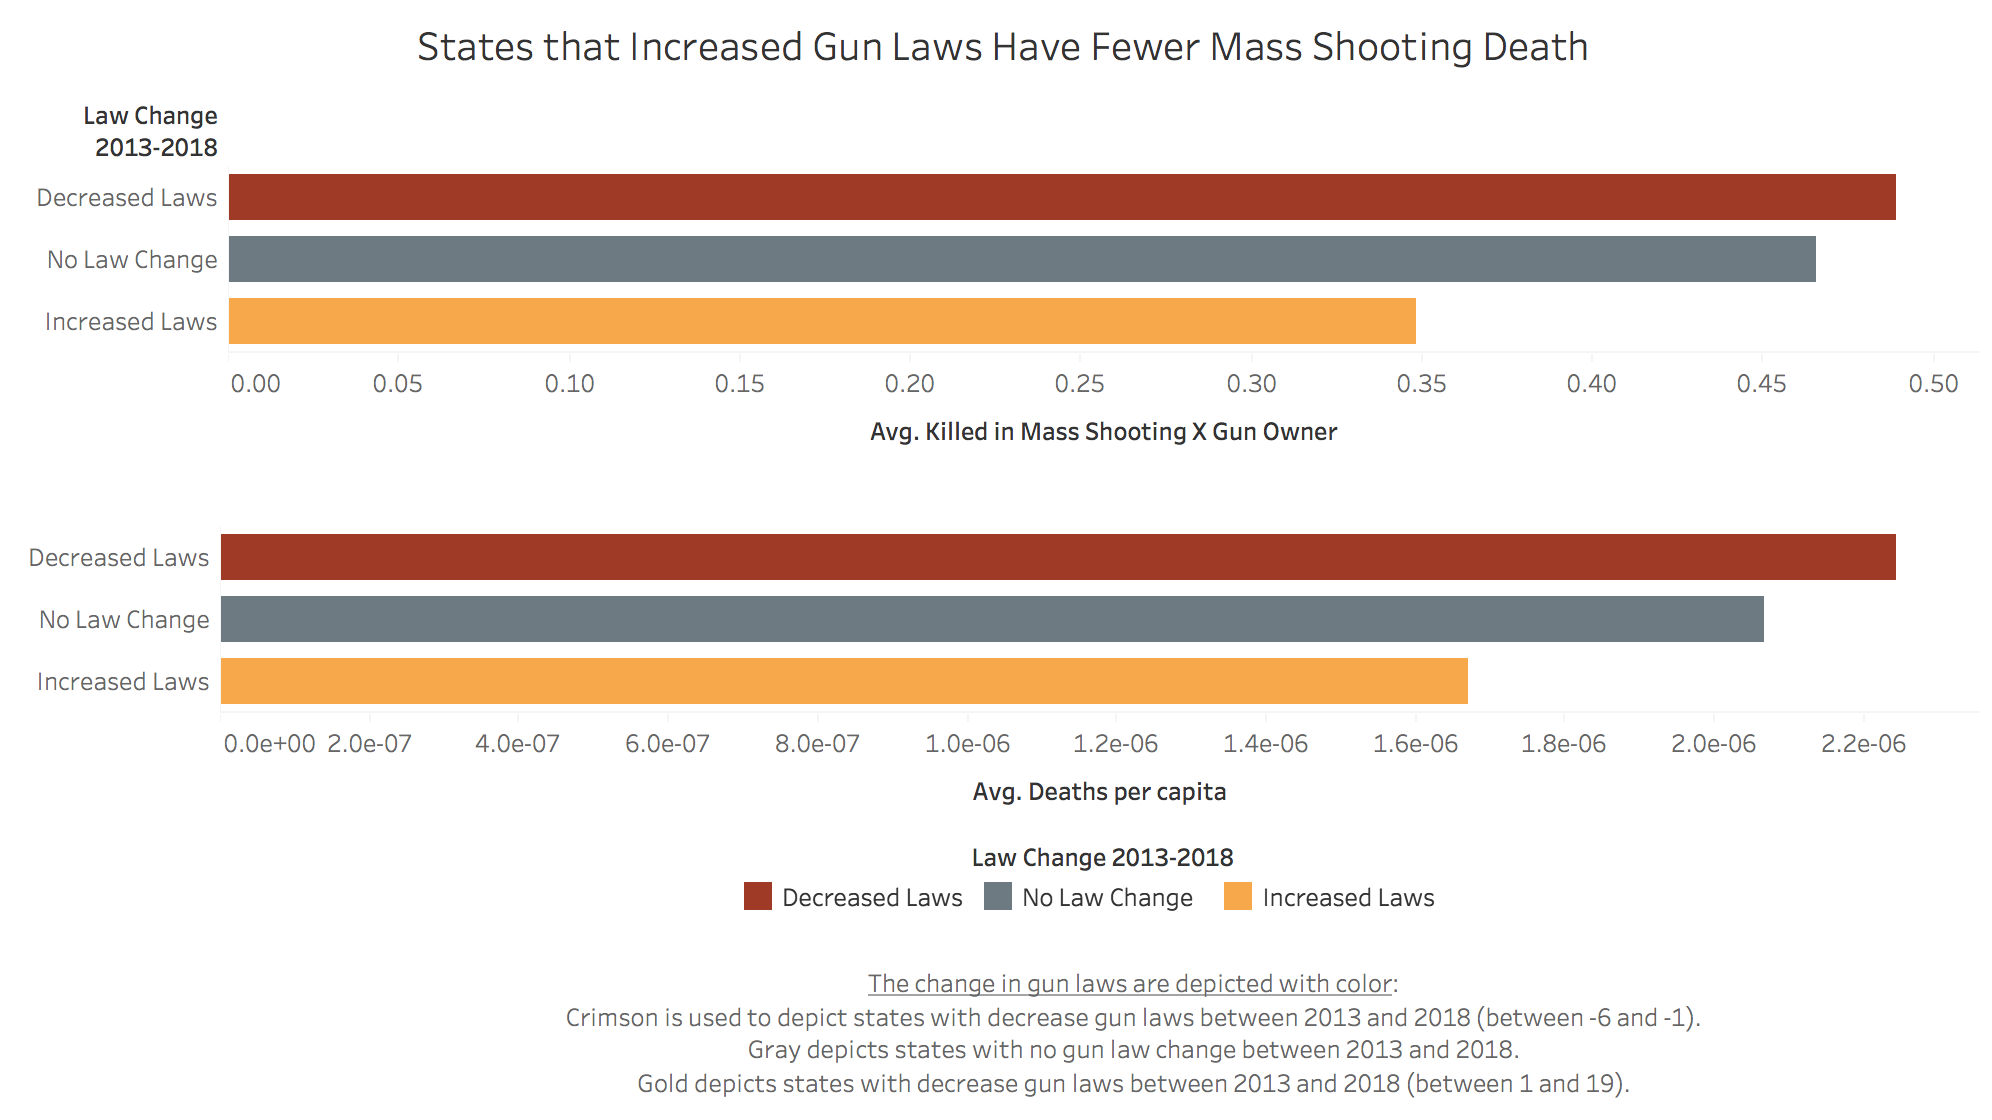

In [6]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/MS_lawChange_revised.png', width = 1200, height = 680)

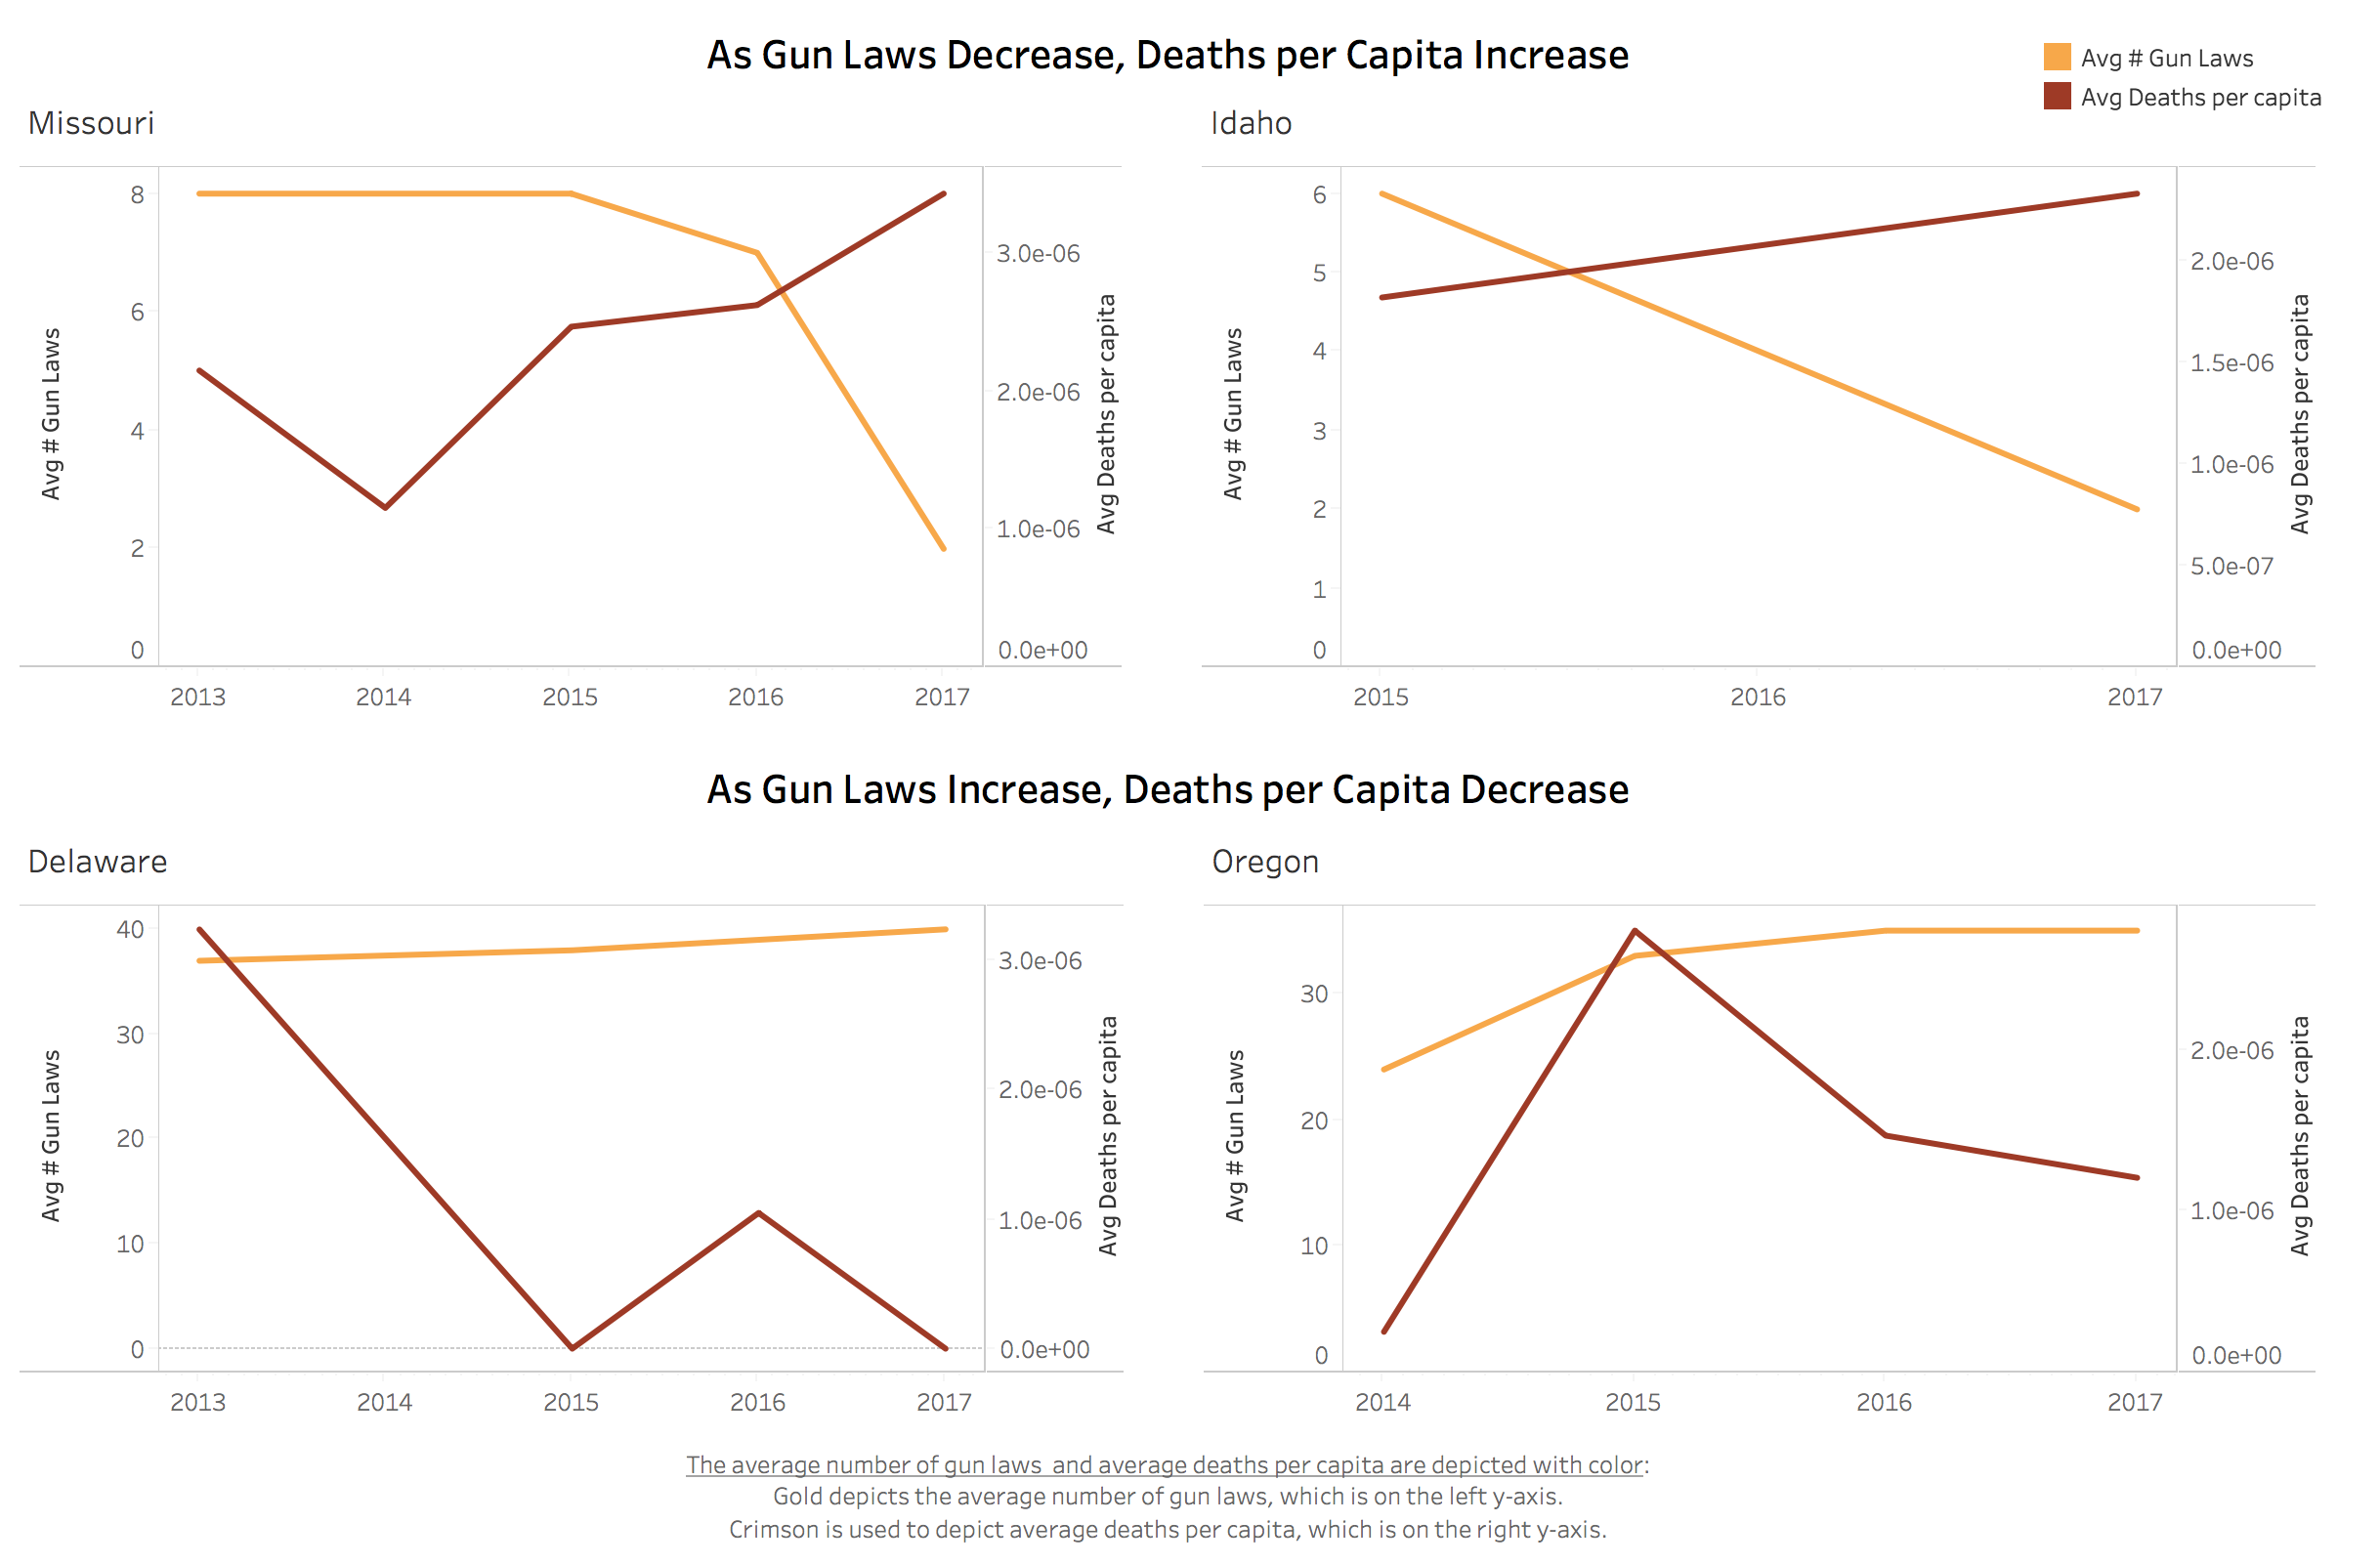

In [7]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/MS_CaseStudy_revised.png', width = 1250, height = 830)

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from IPython.display import Image

In [0]:
world_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/data/World_firearms.csv'
state_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/data/All_Firearm_Deaths_State_Year.csv'
state_owner_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/data/Gun_Owner_Statistics_Per_State.csv'
state_laws_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/data/gun_laws_data.csv'
state_code_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/data/states.csv'
ms_url = 'https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/data/Mass_Shooting_Data_2013-2019.csv'
df_world = pd.read_csv(world_url)
df_state = pd.read_csv(state_url)
df_st_owner = pd.read_csv(state_owner_url)
df_state_laws = pd.read_csv(state_laws_url)
df_state_code = pd.read_csv(state_code_url)
df_ms = pd.read_csv(ms_url)

## Audience
We want to target policy makers and voters, because our analysis is about the relationship between gun laws and gun related death. Our finding is that increased gun regulation results in fewer death. 

## World Firearms Data
**Allows us to see which countries have the highest firearm ownership rates and which have the highest murder rates.**

[Article Describing the Data Set](https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list#data)


---



**Description of the Dataset:**

- A collection of data about the world's firearms murders and gun ownership statistics were compiled in a [Google Sheet](https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0). 
- The data is compiled from 2 data sources:

  - The data on firearm homicides was collected by the UNODC through its annual crime survey. This includes the percent of homicides from using a firearm, the number of homicides from using a firearm, and the rate of homicide rate per 100,000 in the population. 
   
  - The data on gun ownership was collected by the small arms survey. This includes the average firearms per 100 people, the average number of civilian firearms, and rank by the rate of gun ownership. The data has been normalized for a rate per 100,000 population. 

- Limitations:
  - Data is missing for Russia, China, and Afghanistan
  - While the Google Spreadsheet says that it is being automatically updated every 5 minutes, the columns for homicide per country that was collected from the UNODC doesn't have information about what year it is for.
   - The data is from an annual crime survey, and it doesn't say if the numbers are being averaged across all years, or if the numbers are for the latest year
  - The data from the small arms survey is only from 2007. 


**Takeaways from this Dataset:**

- The United States has the highest gun ownership in the World. 

- Centra/South America leads on all murder stats, far ahead of US.
  - We think that deaths caused by firearms in Central and South America are due to drug activity and not because of personally owned firearms, since the same Central and South American countries have much lower amounts of gun ownership. 

- To capture the amount of homicides  due to personally owned guns we made a new interaction term - "hom_firearms", which is the average percent of homicides caused by firearms by the average number of firearms per 100 people.  Here we see that the US ranks the highest in the world. 

In [0]:
df_world = df_world.rename(columns={'Country/Territory':'country', 
                   'ISO code': 'iso_code',
                   '% of homicides by firearm' : 'percent_hom_farm',
                   'Number of homicides by firearm' : 'num_hom_farm', 
                   'Homicide by firearm rate per 100,000 pop' : 'hom_farm_rate_100k',
                   'Rank by rate of ownership' : "rank_rate_ownership",
                   'Average firearms per 100 people' : 'avg_farm_100ppl',
                   'Average total all civilian firearms' : 'avg_tot_civ_farm'
                  }) 

df_world = df_world.drop(columns = "Source")
#Interaction Term
df_world['hom_firearms'] = (df_world['avg_farm_100ppl'] * df_world['percent_hom_farm'] )

In [11]:
df_world.head()

,country,iso_code,percent_hom_farm,num_hom_farm,hom_farm_rate_100k,rank_rate_ownership,avg_farm_100ppl,avg_tot_civ_farm,hom_firearms
0,Albania,AL,65.9,56.0,1.76,70.0,8.6,270000.0,566.74
1,Algeria,DZ,4.8,20.0,0.06,78.0,7.6,1900000.0,36.48
2,Angola,AO,NaN,NaN,NaN,34.0,17.3,2800000.0,NaN
3,Anguilla,AI,24.0,1.0,7.14,NaN,NaN,NaN,NaN
4,Argentina,AR,52.0,1198.0,3.02,62.0,10.2,3950000.0,530.40


### Feature Descriptions

**country:** The country name

**iso_code:** unique code for every country or territory

**source:** original data sources

**percent_hom_farm:** percent of homicides by firearms for every country

**num_hom_farm:** number of homicides by firearm

**hom_farm_rate_100k:** homicide by firearm rate per 100,000 people

**rank_rate_ownership:** rank by rate of ownership

**avg_farm_100ppl:** average firearms per 100 people

**avg_tot_civ_farm:** average of all total civilian firearms

<strong> hom_firearms: </strong> home_farm_rate_100k interacted with percent_hom_farm 

#### Compare the homicides and firearm ownership of the US to the average across the rest of the world

In [12]:
# Descriptive Statistics for the United States

dfus = df_world[df_world.country == 'United States']
dfus

,country,iso_code,percent_hom_farm,num_hom_farm,hom_farm_rate_100k,rank_rate_ownership,avg_farm_100ppl,avg_tot_civ_farm,hom_firearms
176,United States,US,60.0,9146.0,2.97,1.0,88.8,270000000.0,5328.0


In [13]:
# Clean Null values and list the average of each column across all countries

print("Average percent of homicides by firearms for all countries is " + str(df_world.percent_hom_farm[df_world.percent_hom_farm.isna() == False].mean()))
print("Average number of homicides by firearm for all countries is " + str(df_world.num_hom_farm[df_world.num_hom_farm.isna() == False].mean()))
print("Average homicide by firearm rate for every 100k people for all countries is " + str(df_world.hom_farm_rate_100k[df_world.hom_farm_rate_100k.isna() == False].mean()))
print("Average rank_rate_ownership for all countries is " + str(df_world.rank_rate_ownership[df_world.rank_rate_ownership.isna() == False].mean()))
print("Average firearms per 100 people for all countries is " + str(df_world.avg_farm_100ppl[df_world.avg_farm_100ppl.isna() == False].mean()))
print("Average total civilians firearms for all countries is " + str(df_world.avg_tot_civ_farm[df_world.avg_tot_civ_farm.isna() == False].mean()))

Average percent of homicides by firearms for all countries is 32.22931034482759
Average number of homicides by firearm for all countries is 1100.0603448275863
Average homicide by firearm rate for every 100k people for all countries is 4.885862068965518
Average rank_rate_ownership for all countries is 88.9090909090909
Average firearms per 100 people for all countries is 10.236931818181821
Average total civilians firearms for all countries is 3659138.6363636362


### The US leads the world in homicides by personally owned guns

We interacted the homicide by firearm rate per 100,000 people and percentage of homicides for every country. The United States is the clear leader in homicides by personally owned guns with Switzerland being second. The making of this chart was to fully forefront this fact and draw the reader's attention to the blood red that is the United States. We also wanted to give reference by giving the next 19 countries and our narrative is to focus in on the United States. 

Tableau Public link: https://public.tableau.com/profile/btamsir#!/vizhome/USGunExploration/HomicidesbyPersonallyOwnedGuns?publish=yes

In [14]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/world_firearm1st.png', width = 1300, height = 700)

/usr/local/lib/python3.6/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'tuple'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

## Gun Ownership Per State

**Gun Statistics per State**

[Data Source](http://demographicdata.org/facts-and-figures/gun-ownership-statistics/#)


---

**Description of the Dataset:** 

- This dataset contains a complete set of crime rates, gun deaths and gun ownership rates. There are a total of 51 records and 12 fields which include crime types such as violent, murder, rape, robbery, assault, property, burglary, larceny and motor-related crimes. All data are grouped by state.

- The only statistic we are interested in for this dataset is gun ownership column to merge with the US Firearms Data and the Mass shootings data. 

- Limitations: 
  - Poorly documented how the data was compiled. It seems that the variable of interest, "Gun Ownership (2007)" was taken from the [General Social Survey (GSS)](http://www.norc.org/Research/Projects/Pages/general-social-survey.aspx) , but it is not clear why they used 2007 as the year of data in this aggregate dataset. 

In [15]:
df_st_owner.head()

,State Name,Gun Murder Rate per 100K (2010),Gun Ownership (2007),"Violent Crime (per 100,000) 2013",Murder and nonnegligent manslaughter (per 100K) 2013,Forcible rape (per 100K) 2013,Robbery (per 100K) 2013,Aggravated assault (per 100K) 2013,Property Crime (per 100K) 2013,Burglary (per 100K) 2013,Larceny (per 100K) 2013,Motor Theft (per 100K) 2013
0,Alabama,2.8,51.7%,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8
1,Alaska,2.7,57.8%,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1
2,Arizona,3.6,31.1%,428.9,5.5,34.7,112.7,276.0,3539.2,807.8,2439.1,292.3
3,Arkansas,3.2,55.3%,469.1,5.9,42.3,78.7,342.3,3660.1,1081.3,2384.7,194.1
4,California,3.4,21.3%,423.1,5.0,20.6,148.6,248.9,2758.7,646.1,1669.5,443.2


#### Data Cleaning
Drop unnecessary columns

In [0]:
df_st_owner.drop(['Gun Murder Rate per 100K (2010)','Violent Crime  (per 100,000) 2013','Murder and nonnegligent manslaughter (per 100K) 2013',\
                  'Forcible rape (per 100K) 2013', 'Robbery (per 100K) 2013','Aggravated assault  (per 100K) 2013','Property Crime  (per 100K) 2013',\
                  'Burglary  (per 100K) 2013','Larceny (per 100K) 2013', 'Motor Theft (per 100K) 2013'],axis = 1, inplace = True)

In [0]:
df_st_owner.rename(columns = {'State Name': 'State'}, inplace = True)

In [0]:
df_st_owner.rename(columns = {'Gun Ownership (2007)': 'Gun_Ownership_2007'}, inplace = True)

#### List the top 10 rank ordered States in terms of gun ownership

In [19]:
df_st_owner['Gun_Ownership_2007'] = df_st_owner['Gun_Ownership_2007'].str.rstrip('%').astype(float)/100

df_st_owner.sort_values(by = 'Gun_Ownership_2007', ascending=False).head(10)

,State,Gun_Ownership_2007
50,Wyoming,0.597
1,Alaska,0.578
26,Montana,0.577
41,South Dakota,0.566
48,West Virginia,0.554
12,Idaho,0.553
3,Arkansas,0.553
24,Mississippi,0.553
0,Alabama,0.517
34,North Dakota,0.507


## State Firearms Laws Data
**The data of all law provisions by year and state as well as the codebook**

[Data Source](https://www.statefirearmlaws.org/resources)

---

**Description of the Dataset:**

- Dataset was created by Boston University Public School of Health to report on the changing landscape of gun policy in the United States

- The data contains the gun laws per state per year from 1991 - 2018

- There are 133 firearm law provisions represented by dummy variable columns of weather a state in a certain year had that law in effect. 
   - The [report](http://sfal.communicatehealth.com/sites/default/files/2017-12/report_0.pdf) that details the laws in the database 

- **Limitations**:
  - The dataset only goes to 2018, so when merging with the other datasets it leads to null values. 


In [20]:
df_state_laws.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,violenth,violentpartial,dealer,dealerh,recordsall,recordsallh,recordsdealer,recordsdealerh,reportall,reportallh,reportdealer,reportdealerh,purge,residential,theft,security,inspection,ammlicense,ammrecords,permit,permith,fingerprint,training,permitlaw,registration,registrationh,defactoreg,defactoregh,ammpermit,...,personalized,lockd,lockp,locked,lockstandards,capliability,capaccess,capuses,capunloaded,cap18,cap16,cap14,junkgun,liability,immunity,preemption,preemptionnarrow,preemptionbroad,mcdv,mcdvdating,mcdvsurrender,mcdvsurrendernoconditions,mcdvsurrenderdating,mcdvremovalallowed,mcdvremovalrequired,incidentremoval,incidentall,dvro,dvrodating,exparte,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Alabama,1991,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
1,Alaska,1991,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,Arizona,1991,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
3,Arkansas,1991,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
4,California,1991,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58


In [21]:
# Only keep the year, state and the total number of laws 
df_state_laws = df_state_laws[['state', 'year', 'lawtotal']]

df_state_laws.head()

,state,year,lawtotal
0,Alabama,1991,15
1,Alaska,1991,10
2,Arizona,1991,12
3,Arkansas,1991,15
4,California,1991,58


#### We find the difference in the number of gun laws per state by subtracting the number of laws on book in 2018 by the number of laws on book in 2011.  We can merge this onto out mass shootings dataset to see how increasing or decreasing the number of gunlaws affects the number of mass shootings. 


While our mass shootings dataset only has data from 2013 to 2018, we consider that gun laws might have a lagged effect. 

In [22]:
df_law_diff = df_state_laws[df_state_laws.year >2010].groupby('state').agg(lambda x: x.iloc[-1] - x.iloc[0])
df_law_diff = df_law_diff.reset_index()
df_law_diff = df_law_diff.rename(columns = {'lawtotal': 'Law_diff', 'state': 'State'}).drop(columns = 'year')
df_law_diff.head()

,State,Law_diff
0,Alabama,-1
1,Alaska,-1
2,Arizona,0
3,Arkansas,-2
4,California,15


## United States Firearms Data

**The firearm injury related deaths per state and year due to suicides, homicides and unintentional causes.**

---

**Description of the Dataset:**

- Data on fatal injuries due to firearm was taken from the [CDC](https://www.cdc.gov/injury/wisqars/fatal.html) fatal injury data. 

  - WISQARS Fatal’s mortality reports provide tables of the total numbers of injury-related deaths and the death rates per 100,000 population. The reports lists deaths according to cause (mechanism) and intent (manner) of injury by state, race, Hispanic origin, sex, and age groupings.
  
- Data was collected from 1999 - 2017.

- Mortality data reported in WISQARS come from death certificate data reported to the National Center for Health Statistics (NCHS), CDC. NCHS collects, compiles, verifies and prepares these data for release to the public.

- Data was filtered on firearms as the mechanism for 3 data exports:
  - The intent was filtered on suicides, homicides and unintentional causes separately and exported as 3 csv files. 
  - For ease of having one dataset, these csv files were combined in excel with the intent listed under "Type".

- Limitations: 
  - For sub-national geography, not present or publish death counts of 9 or fewer or death rates based on counts of nine or fewer are presnt as "P" for the value. Since these values are not reliable, they will be replaced with "0" for numerical representation. 

**citation:** Centers for Disease Control and Prevention, National Centers for Injury Prevention and Control. Web-based Injury Statistics Query and Reporting System (WISQARS) [online]. (2005) {cited 2019 May 16}. Available from: www.cdc.gov/injury/wisqars

---
Disclaimer: This data is used for a school research project to report on firearms analysis and may not be repurposed for anything other than statistical reporting and analysis. Make no attempt to learn the identity of any person or establishment included in these data.
Make no disclosure or other use of the identity of any person or establishment discovered inadvertently and advise the NCHS Confidentiality Officer of any such discovery.

"The data source for WISQARS Fatal Injury Data Visualization is the National Vital Statistics System (NVSS) operated by the National Center for Health Statistics. WISQARS provides death counts and death rates for the United States and by state, county, age, race, Hispanic ethnicity, sex, leading cause of death, injury intent, and injury mechanism categories. WISQARS can be used to query death data for the years 2001 - 2017, of which the underlying cause of death is specified using ICD-10 codes. The National Center for Health Statistics (NCHS) in an agreement with the National Association of Public Health Statistics and Information Systems (NAPHSIS) has implemented a new, more restrictive rule for reporting state- and county-level death data for years 2008 and later from NVSS in order to avoid inadvertent disclosure of a decedent's identity. Therefore, the Statistics, Programming and Economics Branch, Division of Analysis, Research, and Practice Integration, NCIPC has modified WISQARS to accommodate the new data suppression rule; i.e., no figure, including totals, should be less than 10 in tabulations for sub-national geographic areas, regardless of the number of years combined with the 2008 and later data. Tabulations, charts, and maps produced by WISQARS using only NVSS death data for years prior to 2008 are not affected by this new rule. Therefore, queries of state-level data for years 1999 through 2007 will remain unrestricted; queries of state-level data that include 2008 or later are restricted. As a WISQARS user, please read the following data use restrictions and click "I Agree." You will then be given access to this WISQARS module."

In [23]:
df_state.head()

,Sex,Race,State,Ethnicity,Age Group,First Year,Last Year,Cause of Death,Year,Deaths,Population,Crude Rate,Age-Adjusted Rate
0,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Unintentional Firearm,1999.0,51,4430143,1.15,1.15722772
1,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Unintentional Firearm,2000.0,34,4451687,0.76,0.76222845
2,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Unintentional Firearm,2001.0,41,4467634,0.92,0.926071313
3,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Unintentional Firearm,2002.0,45,4480089,1,0.997164737
4,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Unintentional Firearm,2003.0,38,4503491,0.84,0.82537211


#### Data Cleaning

In [0]:
# Remove row of data that is the aggregate of all deaths per state across all years for a specific cause of death (this is done by removing the row of data where the year is null)
df_state = df_state[pd.notnull(df_state['Year'])]

In [0]:
df_state.rename(columns = {'Cause of Death':'cause_of_death'}, inplace = True)

In [26]:
# We will consider the value "P" a zero 
# We know the data imputed "P" where they weren't positive what the death rate was because it was too low (between 0-9)  
# We want to keep the data numerical and continuous, so replacing them with 0 is the best option

df_state['Deaths'] = df_state['Deaths'].replace("P", 0)

# Check to make sure there are no null values
df_state.isna().sum()

Sex                  0
Race                 0
State                0
Ethnicity            0
Age Group            0
First Year           0
Last Year            0
cause_of_death       0
Year                 0
Deaths               0
Population           0
Crude Rate           0
Age-Adjusted Rate    0
dtype: int64

In [0]:
# Drop unneccesary columns

df_state.drop(['Sex','Race','Ethnicity','Age Group','First Year','Last Year','Crude Rate',\
               'Age-Adjusted Rate'],axis = 1, inplace = True)

In [0]:
# Merge the state data with the percentage of gun owners and the amount of gun laws
df_state_tot = df_state.merge(df_st_owner, how = 'left', on = "State")

df_state_tot.Year.astype(int)
df_state_tot = df_state_tot.merge(df_state_laws, how = 'left', left_on = ['State', 'Year'],  right_on = ['state', 'year'])

In [29]:
df_state_tot.head()

,State,cause_of_death,Year,Deaths,Population,Gun_Ownership_2007,state,year,lawtotal
0,Alabama,Unintentional Firearm,1999.0,51,4430143,0.517,Alabama,1999.0,16.0
1,Alabama,Unintentional Firearm,2000.0,34,4451687,0.517,Alabama,2000.0,11.0
2,Alabama,Unintentional Firearm,2001.0,41,4467634,0.517,Alabama,2001.0,11.0
3,Alabama,Unintentional Firearm,2002.0,45,4480089,0.517,Alabama,2002.0,11.0
4,Alabama,Unintentional Firearm,2003.0,38,4503491,0.517,Alabama,2003.0,11.0


#### Create New Columns
* Death per capita
* Deaths by gun ownership percent

In [0]:
# Change 'Deaths' to float for calculation
df_state_tot['Deaths'] = pd.to_numeric(df_state_tot['Deaths'])

In [0]:
df_state_tot['Deaths_per_capita'] = df_state_tot['Deaths']/df_state_tot['Population']
df_state_tot['Deaths_x_guns'] = df_state_tot['Deaths']*df_state_tot['Gun_Ownership_2007']
df_state_tot['Deaths_percap_x_guns'] = df_state_tot['Deaths_per_capita']*df_state_tot['Gun_Ownership_2007']

### Feature Descriptions

**State:** The state name

**cause_of_death:** Categorical Variable (Unintentional Firearm, Homicide/Legal Intervention Firearm, Suicide Firearm)

**Year:** Year 1999-2017

**Deaths:** The number of deaths per state per year per cause of death

**Population:** The population per state per year

**Gun_Ownership_2007:** The percent of people who own firearms in each state

**Deaths_per_capita:** The number of gun related deaths divided by the population per state per year

**Deaths_x_guns:** An interaction term of the number of gun related deaths multiplied by the percent of gun ownership in each state per year

**Deaths_percap_x_guns:** An interaction term of the number of deaths per capita multiplied by the percent of gun ownership in each state per year

**lawtotal:** The total number of gun laws per state per year

### States vary in deaths per Capita 

We wanted to give quick look at the differences in deaths per capita by state. 

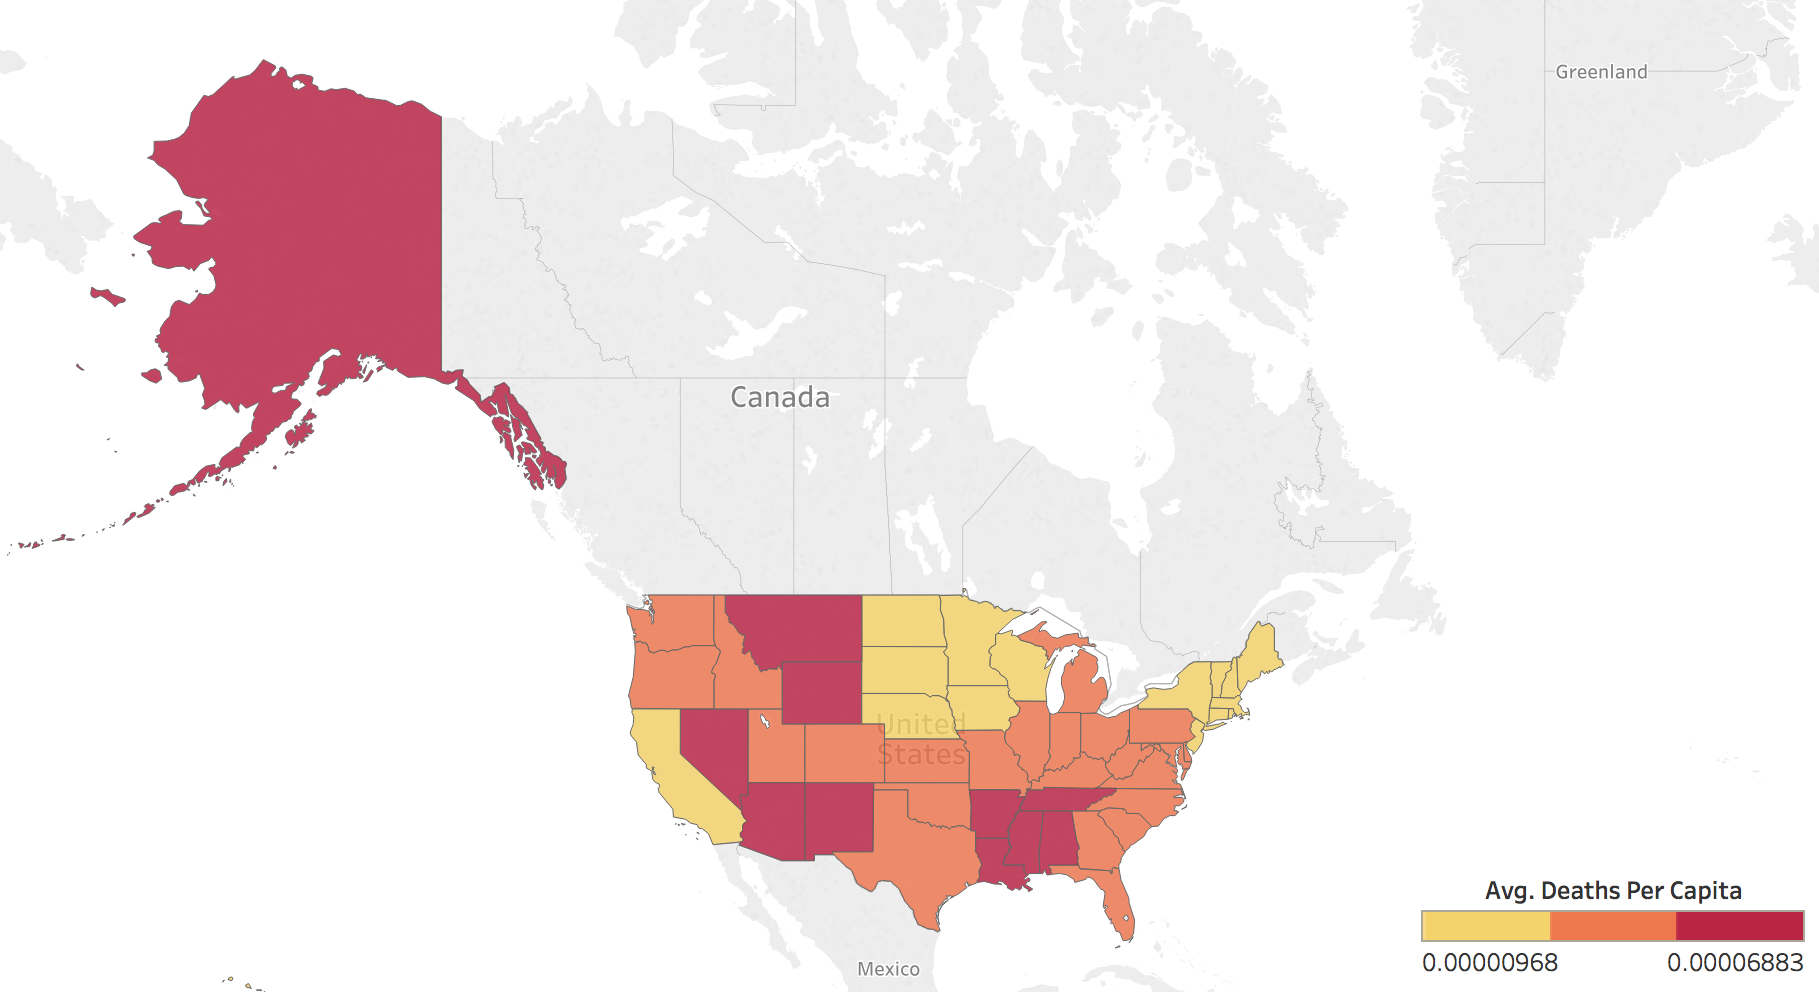

In [32]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/Deaths_by_state.png', width = 1300, height = 700)

#### Time series summary statistics

In [33]:
df_state_tot.groupby('Year')['Deaths','Deaths_per_capita', 'Deaths_x_guns', 'Deaths_percap_x_guns'].agg(['sum','mean']).T

Year                             1999.0  ...        2017.0
Deaths               sum   28441.000000  ...  39277.000000
                     mean    185.888889  ...    256.712418
Deaths_per_capita    sum       0.005595  ...      0.006827
                     mean      0.000037  ...      0.000045
Deaths_x_guns        sum    9759.576000  ...  13912.179000
                     mean     63.788078  ...     90.929275
Deaths_percap_x_guns sum       0.002145  ...      0.002782
                     mean      0.000014  ...      0.000018

[8 rows x 19 columns]

### As we saw from the previous data set, the United states had the highest amount of deaths due to guns in the world. When investigating the amount of deaths by state we can see that states vary in the amount of gun deaths per capita. Here we explore different reasons for the variation and potential solutions.   Perhaps the root cause is the number of gun laws a state has. 

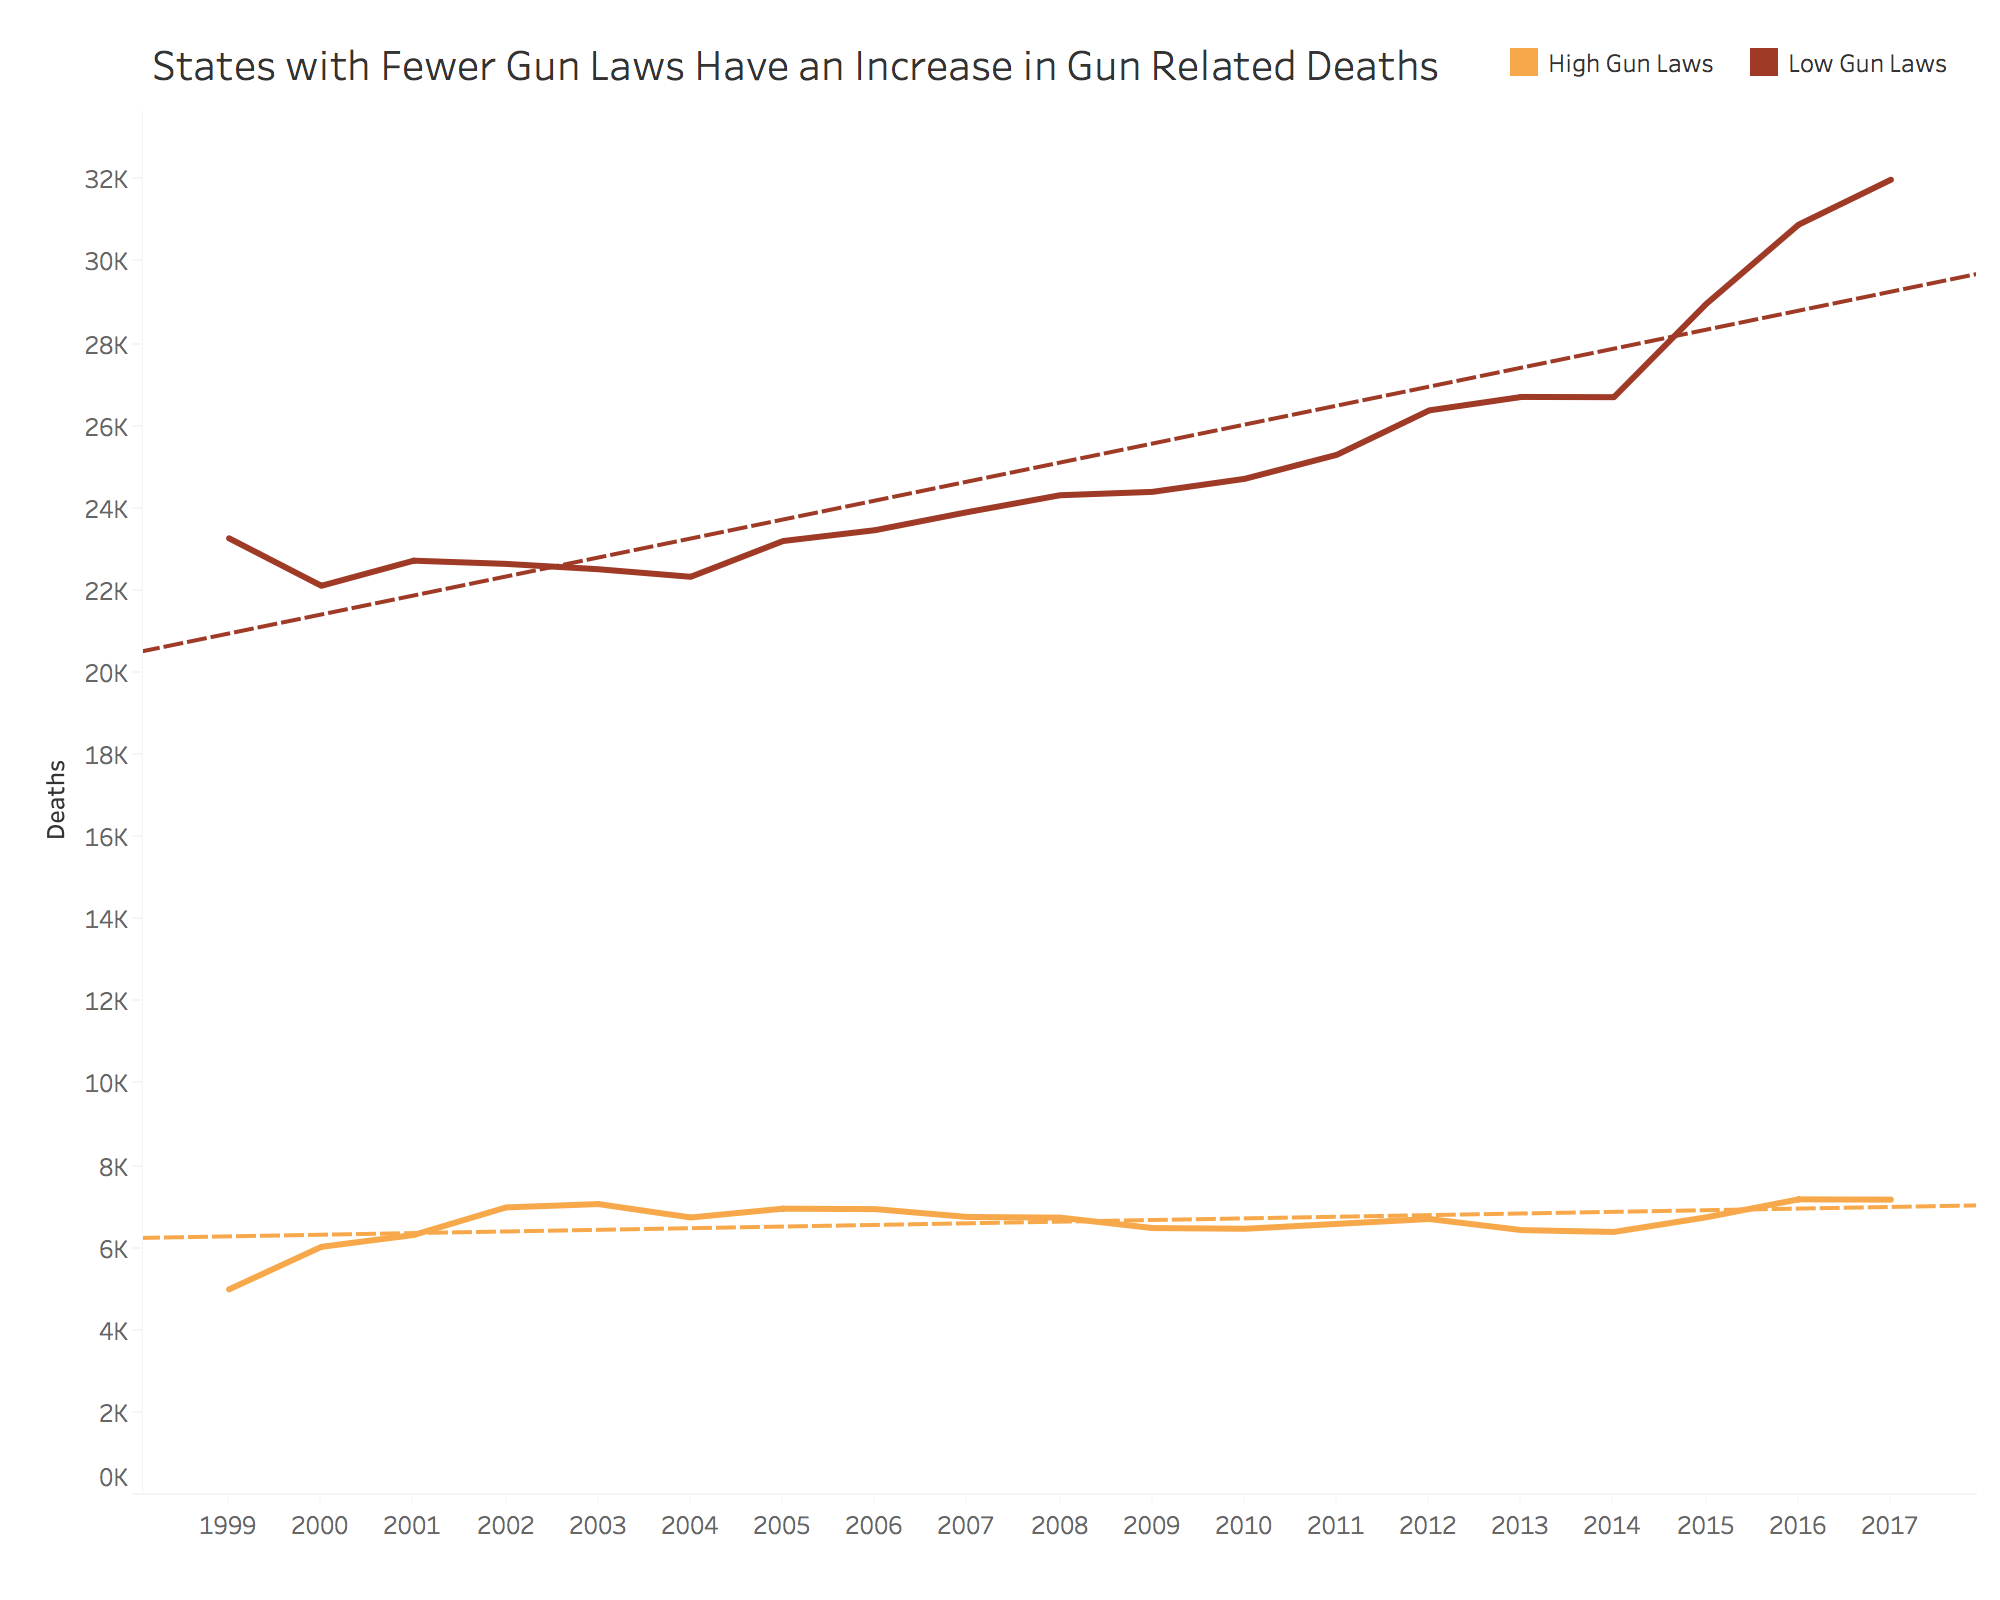

In [34]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/state_gun_law_deaths.png', width=800, height=600)

#### Finding the top 10 average deaths per capita by guns per state and cause of death

In [35]:
df_state_tot.groupby(['State','cause_of_death'])['Deaths','Deaths_per_capita', 'Deaths_x_guns', 'Deaths_percap_x_guns'].agg(['sum','mean']).reset_index().sort_values([('Deaths_percap_x_guns', 'mean')], ascending=False).head(10)

State   cause_of_death  ... Deaths_percap_x_guns          
                                     ...                  sum      mean
151        Wyoming  Suicide Firearm  ...             0.001599  0.000084
79         Montana  Suicide Firearm  ...             0.001533  0.000081
4           Alaska  Suicide Firearm  ...             0.001526  0.000080
37           Idaho  Suicide Firearm  ...             0.001151  0.000061
145  West Virginia  Suicide Firearm  ...             0.001150  0.000061
10        Arkansas  Suicide Firearm  ...             0.001044  0.000055
1          Alabama  Suicide Firearm  ...             0.000939  0.000049
73     Mississippi  Suicide Firearm  ...             0.000935  0.000049
52        Kentucky  Suicide Firearm  ...             0.000878  0.000046
124   South Dakota  Suicide Firearm  ...             0.000859  0.000045

[10 rows x 10 columns]

### Most deaths are by suicide 

We wanted to take the analysis further and introduce the motive behind gun deaths.  

In [36]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/fewer_gun_laws_more_deaths.png', width=1350, height=300)

/usr/local/lib/python3.6/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'tuple'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

### States with less gun laws have higher deaths per capita 

At the world level, we wanted to look at deaths caused by legal gun owners, and found that the US, which has comparitively lax gun laws, has a high number of deaths by legal gun owners. 

We wanted to see if this trend persists within the US at a state level.  To test this, we compared the total number of gun laws in a state, with the average deaths per capita of that state.  The mirrored bar chart below shows the relationship between these two variables.  

Like in the world dataset, we found that when gun laws are lax, you will see more deaths per capita in general  

This is the Tableau Public link:

https://public.tableau.com/profile/kevin.chang5623#!/vizhome/lesslaws_moredeaths/lawsvsdeathpercapita?publish=yes

In [37]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/laws_vs_deathpercapita2.png', width  = 1086, height = 679 )

/usr/local/lib/python3.6/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'tuple'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

## Mass Shootings in the United States

**Deaths and injuries due to mass shootings in the US**

---

**Description of the Dataset:**

- Data on mass shootings was taken from [Mass Shooting Tracker](https://www.massshootingtracker.org/data), a website dedicated to recording all mass shootings that occur in the US.

- Data collected from 2013 - Present(2019).
  -  The data provided by the website is a csv file for each year, beginning in 2013. We combined the 7 files into one dataset in Excel for ease of use.
- Mass Shooting Tracker uses various valid news sources for their data, and records these sources in their dataset.
- The website defines a mass shooting as any firearm event involving in the injury or death of at least 4 people. 
- This data has been featured by CNN, MSNBC, The New York Times, The Washington Post, and The Economist
- Limitations:
   - This data is compiled by crowd-sourcing
   - While we would have liked to find a government funded data source on this topic,  Congress has effectively blocked the CDC from researching the underlying causes of gun violence as of December 2015, so this is a well compiled dataset from published researchers who volunteer their time. 

**citation:** Mass Shooting Tracker. (2019) {cited 2019 May 19}. Available from: https://www.massshootingtracker.org/data/all

In [38]:
df_ms.head()

,date,name_semicolon_delimited,killed,wounded,city,state,sources_semicolon_delimited
0,5/15/19,Unkown (victims included a 5-yr-old girl),0,4,Los Angeles,CA,https://abc7.com/3-men-5-year-old-girl-shot-at...
1,5/13/19,Unknown,4,1,St. Louis,MO,https://www.stltoday.com/news/local/crime-and-...
2,5/13/19,Unknown (victims included 1 juvenile),0,4,New Orleans,LA,https://www.wdsu.com/article/four-injured-in-c...
3,5/12/19,Unknown,0,4,Paulsboro,NJ,https://6abc.com/5-hurt-after-gunmen-open-fire...
4,5/11/19,Thomas Modzel,0,4,Effort,PA,https://wnep.com/2019/05/11/four-people-shot-a...


In [39]:
df_state_code.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


#### Create New Columns
* year
* month
* weekday


In [0]:
df_ms.date = pd.to_datetime(df_ms.date)
df_ms['year'] = df_ms.date.dt.year
df_ms['month'] = df_ms.date.dt.month
df_ms['weekday'] = df_ms.date.dt.day_name()

#### Merging the state names onto the mass shooting data set in order to merge the percent of gun owners per state and the amount of gun laws per year per state on the mass shootings data set

In [41]:
df_st_owner.head()

,State,Gun_Ownership_2007
0,Alabama,0.517
1,Alaska,0.578
2,Arizona,0.311
3,Arkansas,0.553
4,California,0.213


In [42]:
df_state_laws.rename(columns = {'state':'State'}, inplace = True)
df_state_laws.head()

,State,year,lawtotal
0,Alabama,1991,15
1,Alaska,1991,10
2,Arizona,1991,12
3,Arkansas,1991,15
4,California,1991,58


In [43]:
df_law_diff.head()

,State,Law_diff
0,Alabama,-1
1,Alaska,-1
2,Arizona,0
3,Arkansas,-2
4,California,15


#### Create new table for population for each state each year

In [0]:
df_population = df_state_tot.groupby(['State','year'])['Population'].mean().reset_index(name='Population')

In [45]:
df_population.head()

,State,year,Population
0,Alabama,1999.0,4430143
1,Alabama,2000.0,4451687
2,Alabama,2001.0,4467634
3,Alabama,2002.0,4480089
4,Alabama,2003.0,4503491


#### Create table for gun law change between 2013 and 2017

In [0]:
df_17lawtotal = df_state_laws[df_state_laws.year == 2017]
df_13lawtotal = df_state_laws[df_state_laws.year == 2013]
df_17lawtotal = df_17lawtotal.rename(columns = {'lawtotal': 'lawtotal_2017'}).drop(columns = 'year')
df_13lawtotal = df_13lawtotal.rename(columns = {'lawtotal': 'lawtotal_2013'}).drop(columns = 'year')
df_13_17_lawchange = df_13lawtotal.merge(df_17lawtotal, how = 'left', on = "State")
df_13_17_lawchange['numLawChange'] = \
df_13_17_lawchange.lawtotal_2017 - df_13_17_lawchange.lawtotal_2013

In [67]:
df_13_17_lawchange.head()

,State,lawtotal_2013,lawtotal_2017,numLawChange
0,Alabama,10,10,0
1,Alaska,3,3,0
2,Arizona,8,8,0
3,Arkansas,11,11,0
4,California,99,106,7


#### States with number of law change greater than or equal to 2 

In [69]:
df_13_17_lawchange[(df_13_17_lawchange.numLawChange >= 2) | (df_13_17_lawchange.numLawChange <= -2)]

,State,lawtotal_2013,lawtotal_2017,numLawChange
4,California,99,106,7
6,Connecticut,84,90,6
7,Delaware,37,40,3
9,Georgia,11,6,-5
11,Idaho,5,2,-3
13,Indiana,10,12,2
15,Kansas,8,4,-4
17,Louisiana,8,13,5
22,Minnesota,31,41,10
23,Mississippi,5,2,-3


In [70]:
# States with positive number of law change greater than or equal to 2: 14 states
df_13_17_lawchange[(df_13_17_lawchange.numLawChange >= 2)]

,State,lawtotal_2013,lawtotal_2017,numLawChange
4,California,99,106,7
6,Connecticut,84,90,6
7,Delaware,37,40,3
13,Indiana,10,12,2
17,Louisiana,8,13,5
22,Minnesota,31,41,10
27,Nevada,11,21,10
29,New Jersey,67,75,8
31,New York,73,76,3
36,Oregon,24,35,11


In [71]:
# States with positive number of law change greater than or equal to 2: 9 states
df_13_17_lawchange[(df_13_17_lawchange.numLawChange <= -2)]

,State,lawtotal_2013,lawtotal_2017,numLawChange
9,Georgia,11,6,-5
11,Idaho,5,2,-3
15,Kansas,8,4,-4
23,Mississippi,5,2,-3
24,Missouri,8,2,-6
33,North Dakota,14,10,-4
41,Tennessee,24,22,-2
42,Texas,20,18,-2
47,West Virginia,24,18,-6


#### Merge the gun ownership, the amount of gun laws per year per state, number of	law changed overtime, and	population per year per state on the mass shootings dataset

In [0]:
df_ms_tot = df_ms.copy()
df_ms_tot = df_ms.merge(df_state_code, how ='left', left_on = 'state', right_on = 'Abbreviation')
df_ms_tot = df_ms_tot.merge(df_st_owner, how = 'left', on='State')
df_ms_tot = df_ms_tot.merge(df_state_laws, how = 'left', on = ['State', 'year'])
df_ms_tot = df_ms_tot.merge(df_law_diff, how = 'left', on = 'State')
df_ms_tot = df_ms_tot.merge(df_population, how = 'left', on = ['State', 'year'])

#### Data Cleaning
* Drop unnecessary columns

In [0]:
df_ms_tot.drop(['name_semicolon_delimited','sources_semicolon_delimited', 'state', 'Abbreviation'],axis = 1, inplace = True)

#### Create new calculated columns
* shot
* shot_x_gun_owner
* killed_x_gun_owner
* Deaths_per_capita

In [0]:
df_ms_tot['shot'] = df_ms_tot.killed + df_ms_tot.wounded
df_ms_tot['shot_x_gun_owner'] = df_ms_tot.shot*df_ms_tot['Gun_Ownership_2007']
df_ms_tot['killed_x_gun_owner'] = df_ms_tot.killed*df_ms_tot['Gun_Ownership_2007']
df_ms_tot['death_each_year'] = df_ms_tot.groupby(['State','year'])['killed'].transform('sum')
df_ms_tot['Deaths_per_capita'] = df_ms_tot['death_each_year']/df_ms_tot['Population']

## Feature Descriptions 

**date:** Date when the shooting happened 

**killed:** The number of people killed

**wounded:** The number of people wounded

**city:** The city where the shooting took place

**State:** The state where the shooting took place

**Gun_Ownership_2007:** The percent of people who own guns per state

**year:** The year when the shooting happened

**weekday:** The day of the week that the shooting took place

**shot:** The number of people either killed or wounded in a mass shooting

**shot_x_gun_owner:** The interaction term of the number of people who were shot in a mass shooting multiplied by the percent of gun owners in that state where the shooting occurred. 

**killed_x_gun_owner:** The interaction term of the number of people who were killed in a mass shooting multiplied by the percent of gun owners in that state where the shooting occurred. 

**lawtotal:** The total number of gun laws per state per year

**Law_diff:** The difference in the number of gun laws per state from 2011 thru 2018 (negative means that there is a decrease in the number of gun laws)

**Population:** The population per state per year (data only available until 2017)

**death_each_year:** The number of people killed in mass shootings per state per year

**Deaths_per_capita:** The number of mass shooting deaths per state per year divided by the population per state per year from 2013 to 2017 (NaN for 2018 and 2019, since population data only available until 2017).

In [49]:
df_ms_tot.head()

,date,killed,wounded,city,year,month,weekday,State,Gun_Ownership_2007,lawtotal,Law_diff,Population,shot,shot_x_gun_owner,killed_x_gun_owner,death_each_year,Deaths_per_capita
0,2019-05-15,0,4,Los Angeles,2019,5,Wednesday,California,0.213,NaN,15.0,NaN,4,0.852,0.000,17.0,NaN
1,2019-05-13,4,1,St. Louis,2019,5,Monday,Missouri,0.417,NaN,-6.0,NaN,5,2.085,1.668,5.0,NaN
2,2019-05-13,0,4,New Orleans,2019,5,Monday,Louisiana,0.441,NaN,5.0,NaN,4,1.764,0.000,6.0,NaN
3,2019-05-12,0,4,Paulsboro,2019,5,Sunday,New Jersey,0.123,NaN,8.0,NaN,4,0.492,0.000,3.0,NaN
4,2019-05-11,0,4,Effort,2019,5,Saturday,Pennsylvania,0.347,NaN,0.0,NaN,4,1.388,0.000,4.0,NaN


In [50]:
# The total number of mass shootings where the total people killed were more than 4

df_ms_tot.loc[df_ms_tot.killed >= 4].groupby('year')['killed'].count()

year
2013    47
2014    29
2015    40
2016    43
2017    44
2018    46
2019    13
Name: killed, dtype: int64

In [51]:
# We see the sum of the mass shootings per capita  has a increasing trend over time

df_ms_tot.groupby('year')['Deaths_per_capita','killed_x_gun_owner'].agg(['sum','count','mean'])

Deaths_per_capita                 killed_x_gun_owner                
                   sum count      mean                sum count      mean
year                                                                     
2013          0.000568   329  0.000002            146.359   335  0.436893
2014          0.000399   292  0.000001            114.859   296  0.388037
2015          0.000646   367  0.000002            160.080   371  0.431482
2016          0.001088   460  0.000002            198.428   463  0.428570
2017          0.000973   421  0.000002            202.869   427  0.475103
2018          0.000000     0       NaN            172.348   425  0.405525
2019          0.000000     0       NaN             53.407   140  0.381479

### Effects of less gun laws: More gun ownership, and more mass shootings 

Once we created the categories of High Gun laws, and Low Gun Laws, we wanted to see how these laws would affect the poeple in the state.  

As a sanity check, we compared the gun ownership between these two categories, and found that, unsurprisingly, states with low gun laws have higher gun ownership.  This finding is shown in the **left** bar chart.

Then, we wanted to identify if states with fewer gun laws had more mass shootings then states with many gun laws.  As shown by the **right** chart, states with Low Gun Laws have a higher number of mass shootings compared to High Gun Law states.  

The total gun laws are aggregated at the state and year level were split into two groups:

* **Low Gun Laws** are states that have between 2-45 total gun laws on the books
* **High Gun Laws** are states that have between 63-109 total gun laws on the books

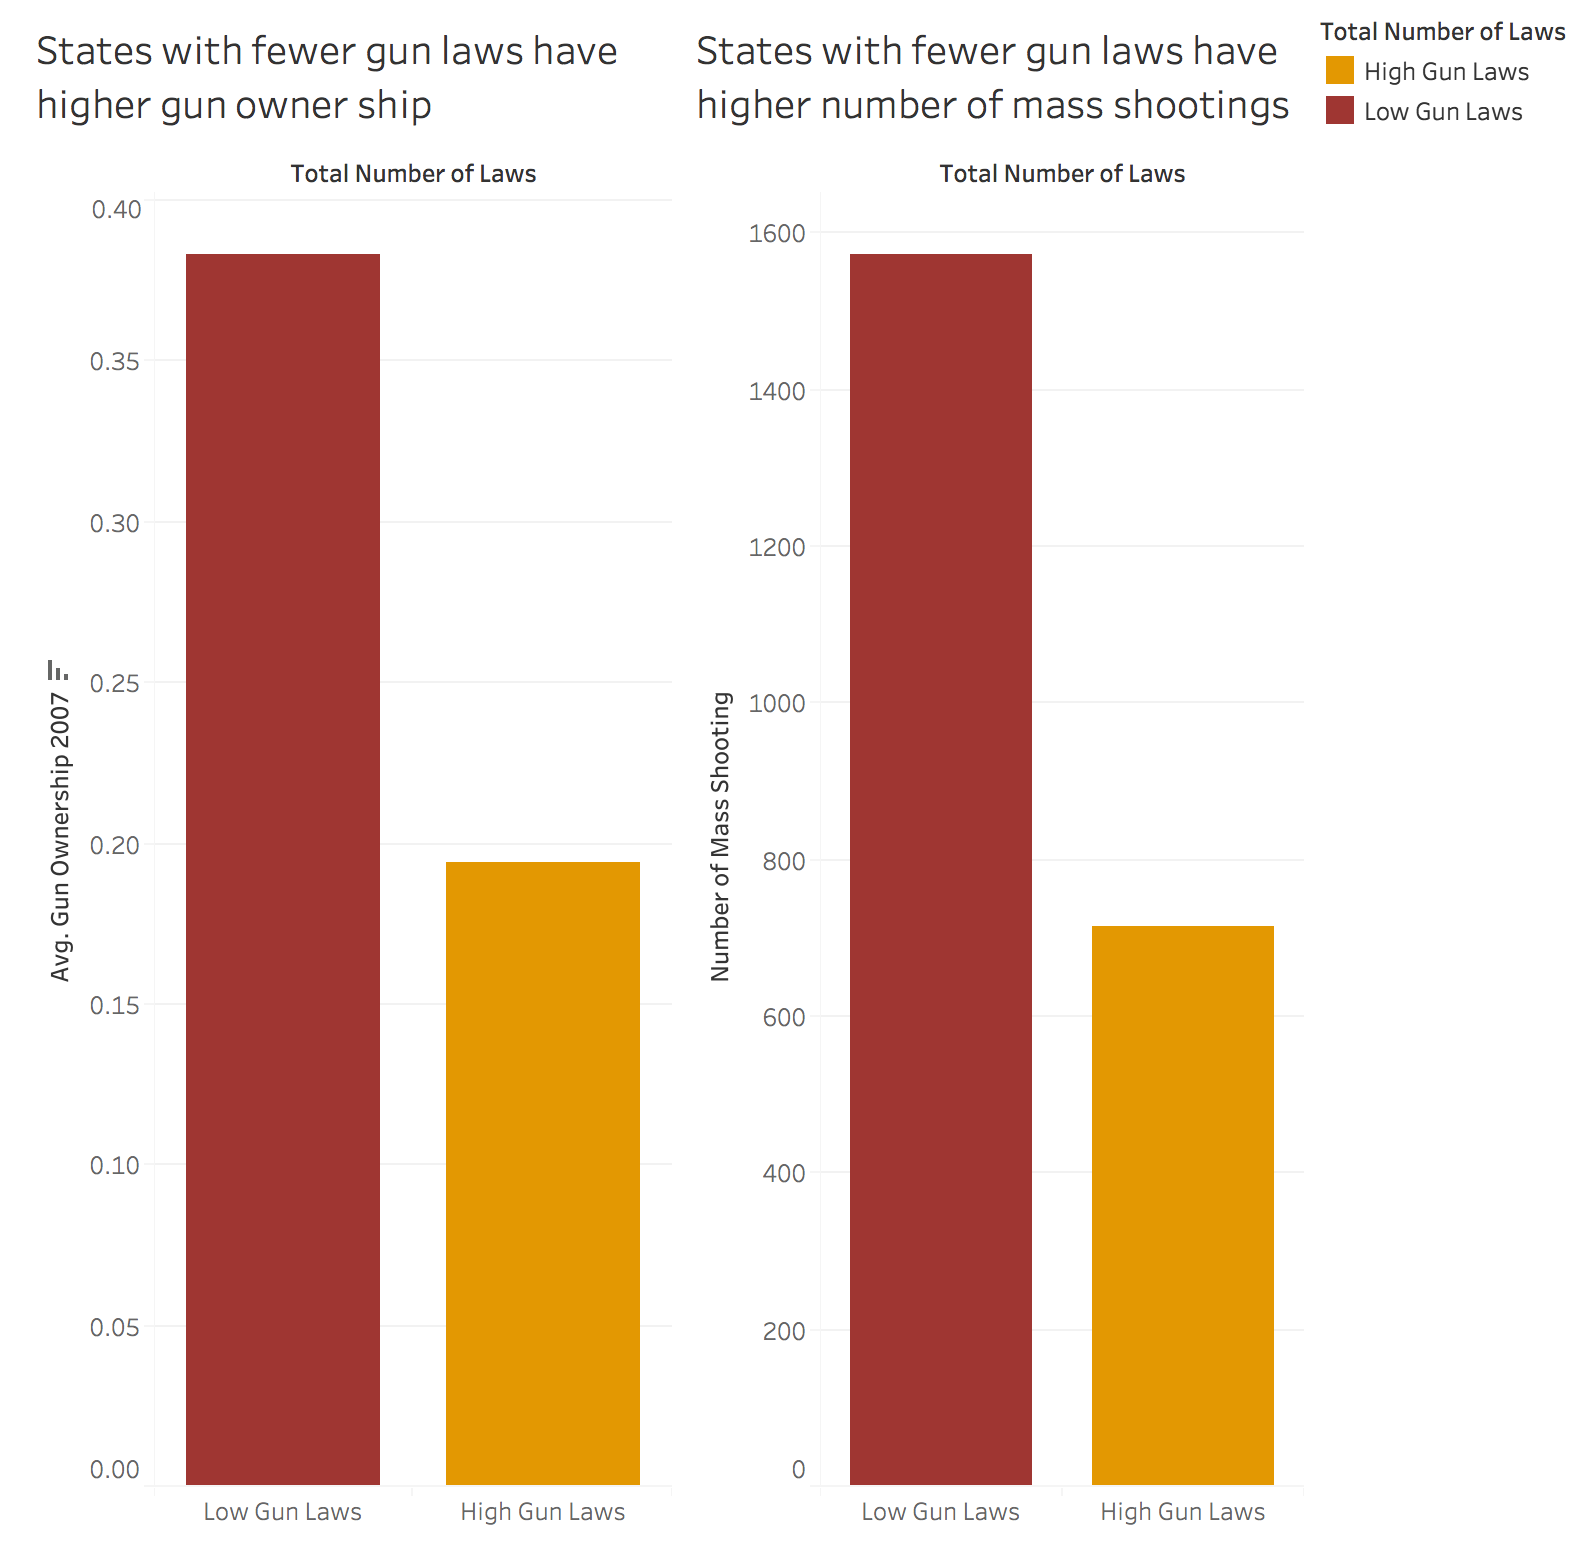

In [52]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/ms_lawgroups.png', width = 800, height = 800)

[Tableau Public link ](https://public.tableau.com/profile/may.jai#!/vizhome/Mass_Shooting_Exploration/Lawtotal)

### States that added more gun laws have fewer gun deaths 

In the previous visualization, we examined the differences between states with many gun laws, and states with few gun laws.  This provided valuable insight, but it only compared data between states.  With the visualizations below, we wanted to compare mass shooting data within individual states.

To do this, we used the variable law_diff, which is the difference gunlaws between 2018 and 2011.  Using law_diff, we were able to group all states into three categories: states that increased their gun laws, states that decreased their gun laws, and states that did not have a change in gun laws.  

We wanted to see if there were any differences between these groups.  From the visualization on the **left**, we can see that states that increased the number of gun laws have less people killed by legal gun owners.  From the visualization on the **right**, we can see that states that increased the number of gun laws also have fewer gun deaths per capita.  

We think this is evidence to support increased gun regulation.  

The change in gun laws were calculated as the difference between the number of gun laws in 2011 and 2018 per state.
* **No Law Change** are states that had zero change in gun laws
* **Increased Laws** are states that had positive change in gun laws (from 1 thru 19)
* **Decreased Laws** are states that had negative change in gun laws (from -6 thru -1)

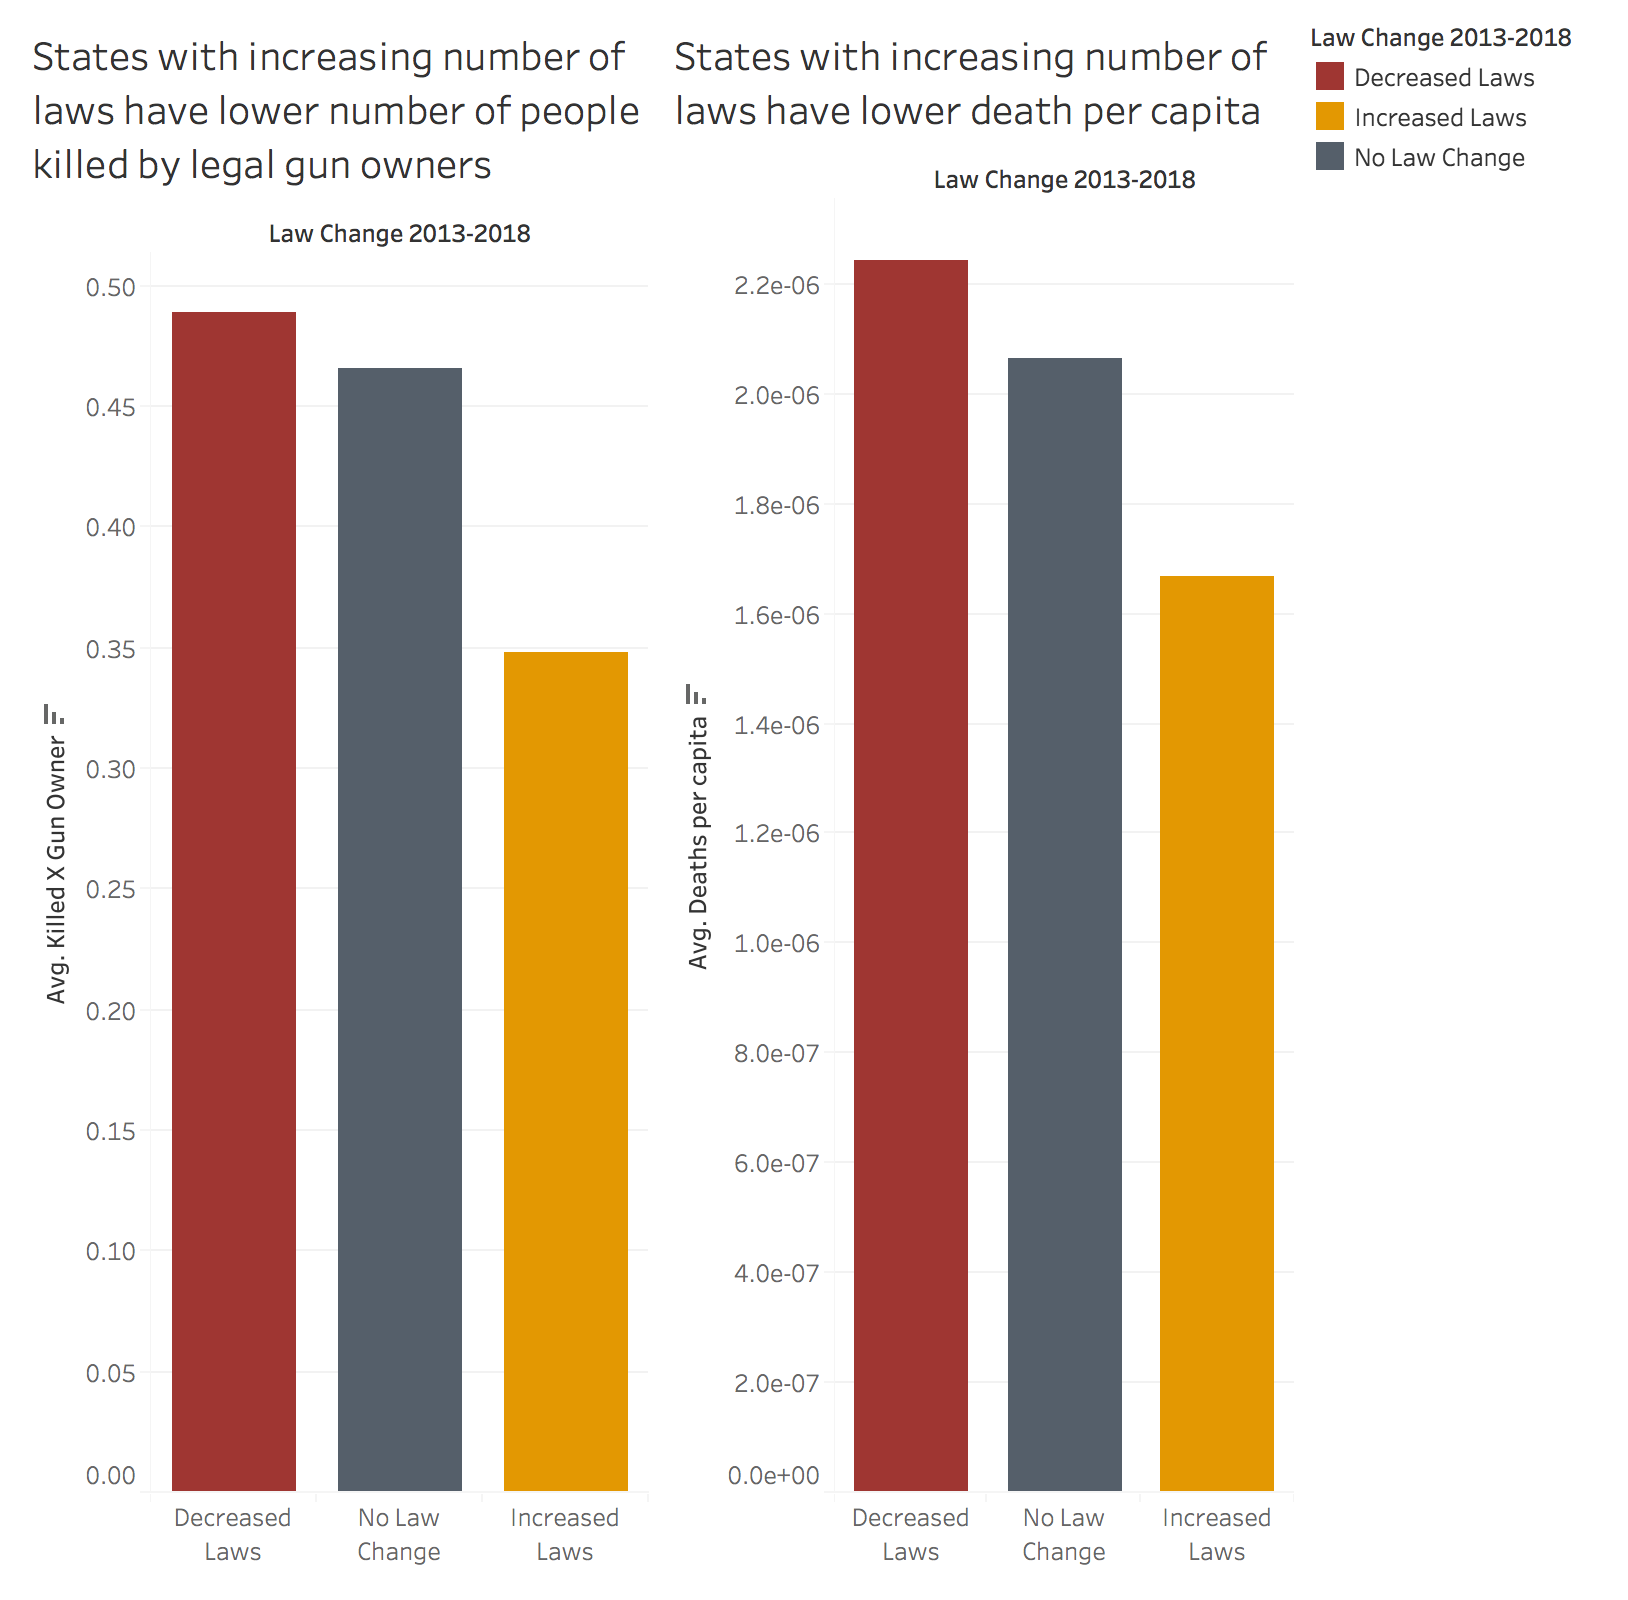

In [53]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/ms_lawdiff.png', width = 800, height = 800)

[Tableau Public link](https://public.tableau.com/profile/may.jai#!/vizhome/Mass_Shooting_Exploration/Lawchange)

### Our findings was corroborated in Missouri and Oregon

These line plots give us a state-level look at the effects of changing gun laws.  

We wanted to show the relationship between the number of gun laws, versus the number of people shot by gun owners.  In Missouri, we see that when gun laws were repealled, the number of people who were shot increased.  Conversely, in Oregon, when additional gun laws were passed, the number of people who were shot decreased.  

The key finding is that changing gun laws produces an immediate, measurable impact on the number of people shot by legal owners in Missouri and Oregon.  At the very least, our prior finding held true in these two states.  In conclusion, we feel that gun regulation should be increased for the entire country.   

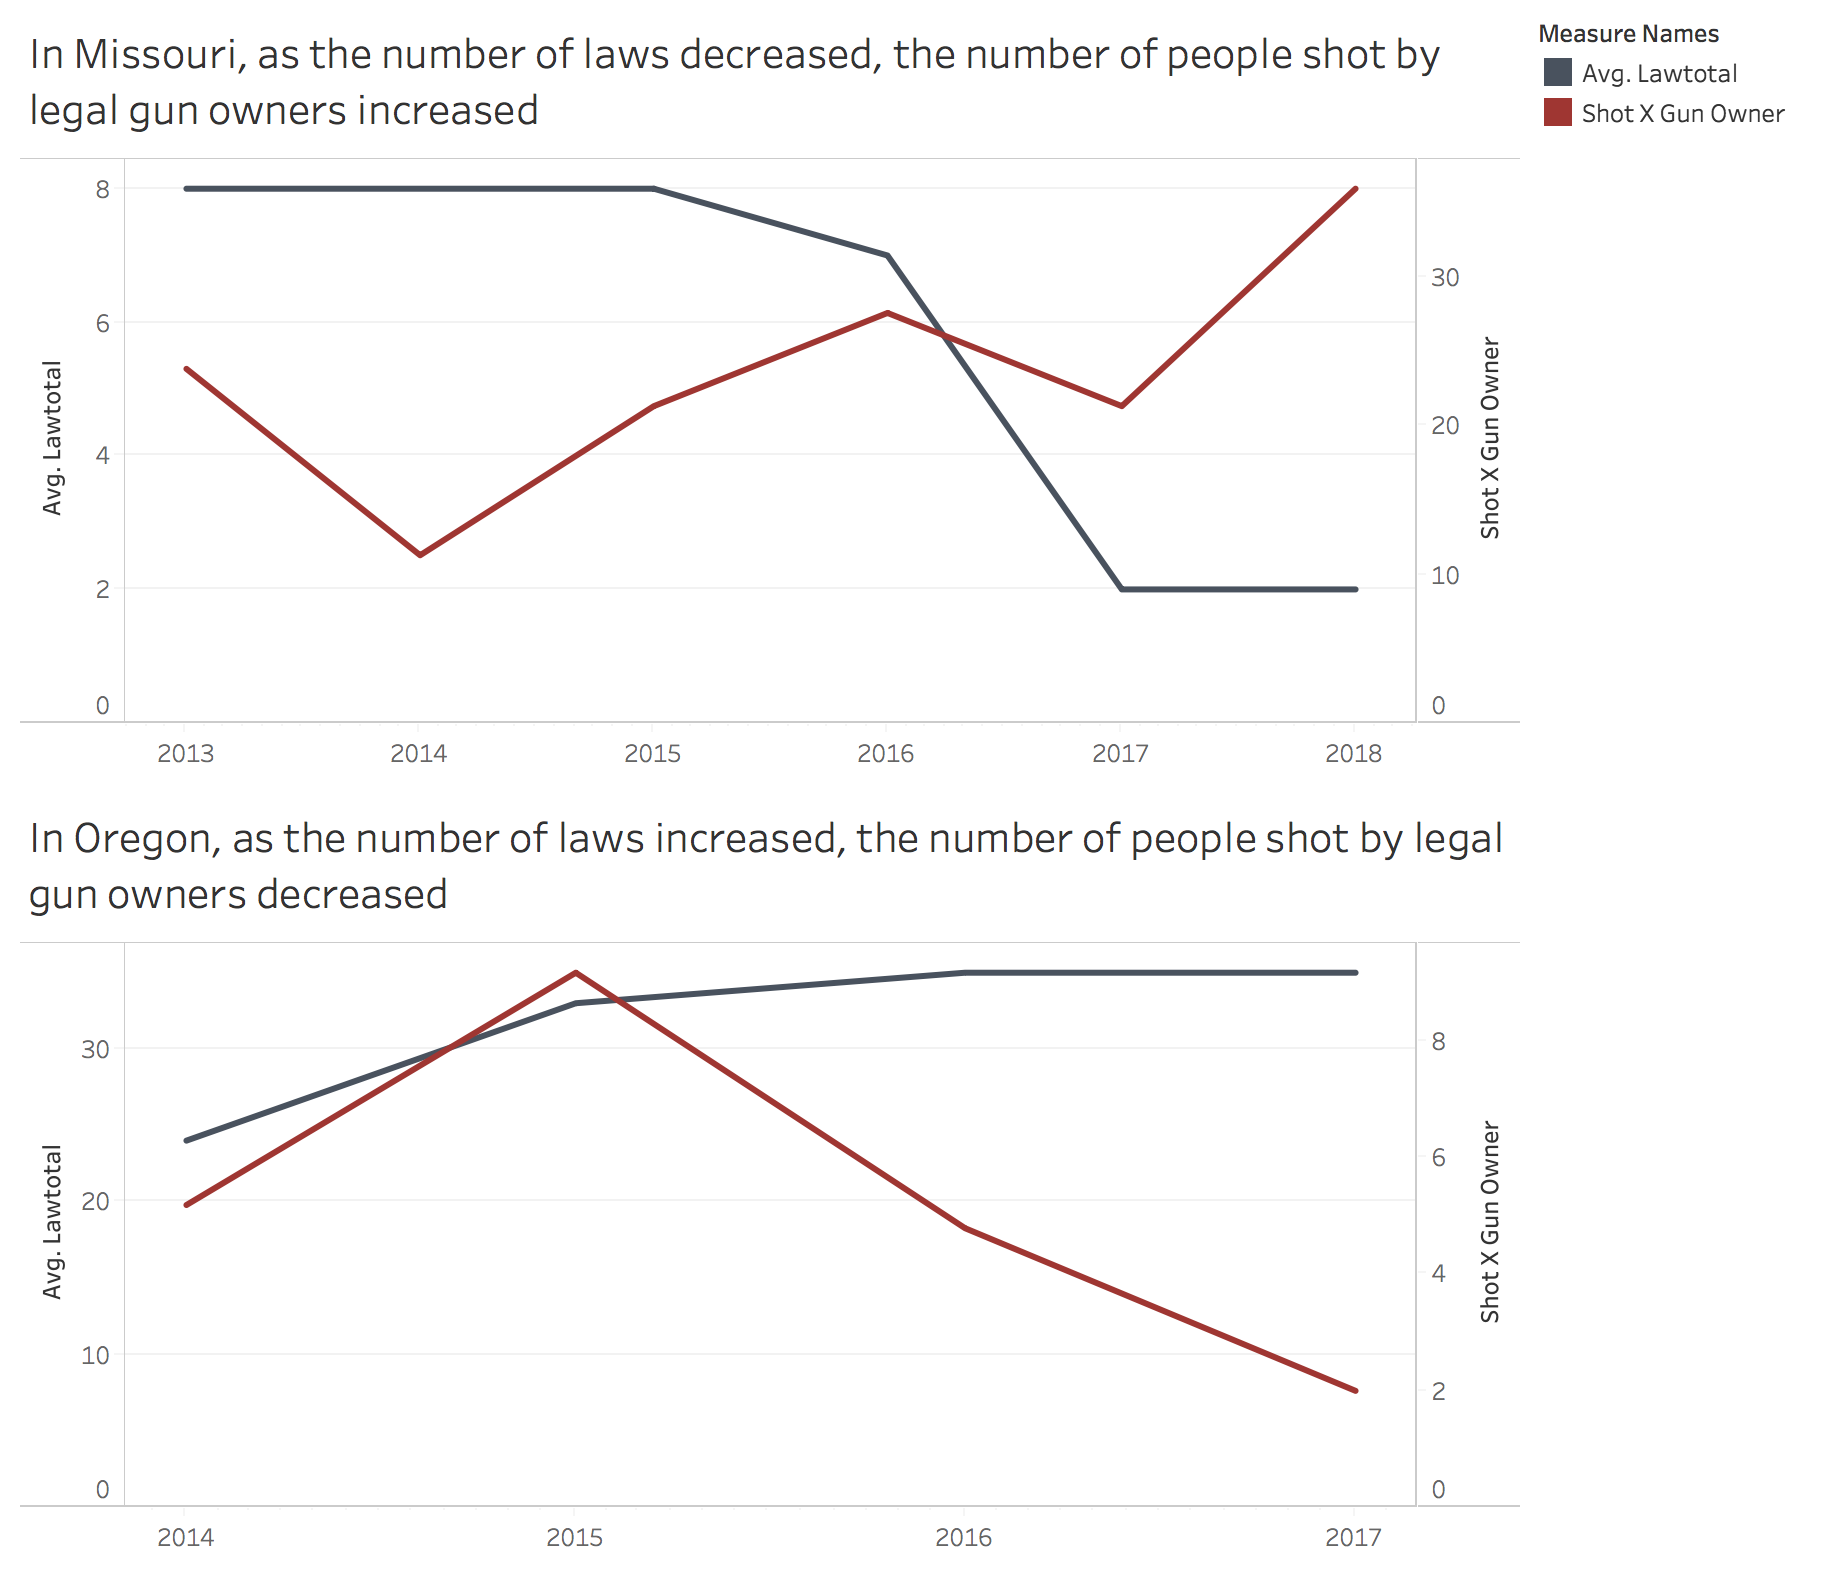

In [54]:
Image('https://raw.githubusercontent.com/ttussing/US-Gun-Exploration-Visualization/master/images/states_examples.png', width = 900, height = 800)

[Tableau Public link](https://public.tableau.com/profile/may.jai#!/vizhome/Mass_Shooting_Exploration/stateexamples)

In [55]:
df_ms_tot.groupby('weekday')['killed','wounded'].agg(['sum','mean','max','min'])

killed                   wounded                   
             sum      mean max min     sum      mean  max min
weekday                                                      
Friday       393  1.408602  10   0     943  3.379928   13   0
Monday       387  1.353147  13   0     960  3.356643   18   0
Saturday     506  0.954717  11   0    2066  3.898113   25   0
Sunday       778  1.154303  59   0    3236  4.801187  422   0
Thursday     415  1.666667  10   0     778  3.124498   16   0
Tuesday      303  1.252066   6   0     818  3.380165   14   0
Wednesday    402  1.640816  17   0     783  3.195918   22   0

## Roadmap

For our narrative, we want to focus on our logistical flow for our arguments. Our next step is to smoothly transition our arguments from higher levels of analysis to more granular levels of analysis.

We begin at the International level and transition into United States' state level data and finally into domestic mass shootings. Initially, we identify that the United States is the leader for homicides by personal guns. Then, we transitioned to compare gun laws at a state level within the United States. Our argument for these visualizations stems from the relationship between deaths and laws. With increasing laws, there is a decrease in overall deaths. Focusing on mass shootings, increased gun regulation results in fewer deaths.

We want to forefront the most crucial attribute of our visualizations with respect to our argument to enable the flow. We want to finalize and polish each of our visualizations by editing features such as better titles, trend lines, descriptive charts, labeling, legends, and other attributes.

Keeping in mind that the most important aspect to persuade and audience, we want to target both policy makers and voters. Our goal is to persuade the audience that more gun regulations results in decreased overall deaths.
